#### Попробуй понормировать образцы и посчитать корреляции нормированных образов уже**
Что я бы точно попробовал:
1) просто придавить log(x+1)
2) log(x+1) + quantile normalize
3) rlog transform
4) считал бы корреляцию только от топ 10-12 тысяч экспрессируемых генов
#### Ещё наверное стоит построить pca  t-sne графики (общий, по типам клеток)**
Но перед pca нужно оставить 10-12к генов, потом сделать log(x+1)или rlog(вроде лучше его), потом quantile normalize
И потом строить уже
Так лучше картинка будет
Для pca лучше так : считаешь среднюю по экспрессию генов по семплам, которые попадут в картинку и берëшь первые 12к значений
Соответственно для каждой картинки они будут разные

In [4]:
import numpy as np
import h5py
import pandas as pd
from itertools import islice
from collections import Counter
import re
from itertools import islice
from collections import Counter
from io import BytesIO
import matplotlib.pyplot as plt
import scipy

## Читаем перекрестные таблицы и сводную таблицу для групп клеток

In [5]:
gt=pd.read_csv('great_table2.csv')
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
dee2=dee.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)
exp2=exp.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)

### Проведем нормализацию по log(x+1)

In [6]:
dee_norm_log=np.log(dee2+1)
exp_norm_log=np.log(exp2+1)
#Chech results of normalization 
print(dee2.head(10))
print(dee_norm_log.head(10))

   GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
0        1857        1946        1460        1731        2064        1829   
1           0           0           0           0           0           0   
2           6          17           4          27          46          61   
3           0           1           1           0           1           4   
4           1           0           0           0           0           0   
5         355         286         233         216         276         318   
6         410         373         213         322         401         293   
7        1279         945         988         891         950         862   
8         224         164         173         185         252         240   
9         124         143         153         214         372         270   

   GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  GSM951561  \
0        1524        1851        1452        1211  ...        856       

### Поиск корреляции по Пирсону на нормализованных по логарифму данных

(array([  6.,   2.,   2.,  10.,  13.,  19.,  17.,  32.,  43.,  50.,  50.,
         41.,  41.,  26.,  24.,  19.,  23.,  17.,   4.,   7.,   6.,   7.,
          4.,   3.,   5.,   2.,   7.,   5.,   4.,   7.,   4.,   8.,   4.,
          5.,   6.,   6.,   8.,   6.,   7.,   7.,  12.,   6.,   7.,   8.,
         11.,  13.,  16.,  11.,  14.,  18.,  31.,  16.,  23.,  36.,  47.,
         52.,  48.,  43.,  57.,  61.,  76., 102., 139., 165., 211., 190.,
        246., 264., 325., 327., 292., 229., 242., 235., 210., 161., 136.,
         97.,  62.,  48.,  51.,  58.,  31.,  40.,  39.,  17.,  24.,  11.,
         16.,  10.,   4.,   4.,   9.,   4.,   6.,   3.,   3.,   2.,   1.,
          1.]),
 array([0.01773579, 0.02221029, 0.0266848 , 0.0311593 , 0.0356338 ,
        0.0401083 , 0.0445828 , 0.0490573 , 0.0535318 , 0.05800631,
        0.06248081, 0.06695531, 0.07142981, 0.07590431, 0.08037881,
        0.08485331, 0.08932782, 0.09380232, 0.09827682, 0.10275132,
        0.10722582, 0.11170032, 0.11617482, 0.

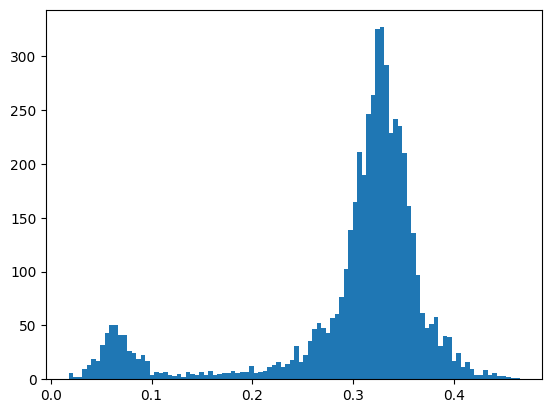

In [7]:
corr_log=exp_norm_log.corrwith(dee_norm_log, axis=0, drop=False, method='pearson')
plt.hist(corr_log, bins=100)

#### То же самое, но для разных групп клеток

In [8]:
def corr_log_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp_norm_log.loc[:, exp_norm_log.columns.intersection(typ_geo)]
    dee_typ=dee_norm_log.loc[:, dee_norm_log.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='pearson')
    return plt.hist(corr_typ, bins=100)
def corr_log_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp_norm_log.loc[:, exp_norm_log.columns.intersection(cl_geo)]
    dee_cl=dee_norm_log.loc[:, dee_norm_log.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='pearson')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

splenic B cells


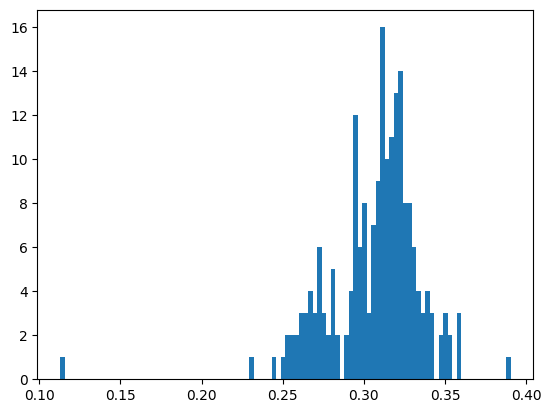

Germinal center B cells


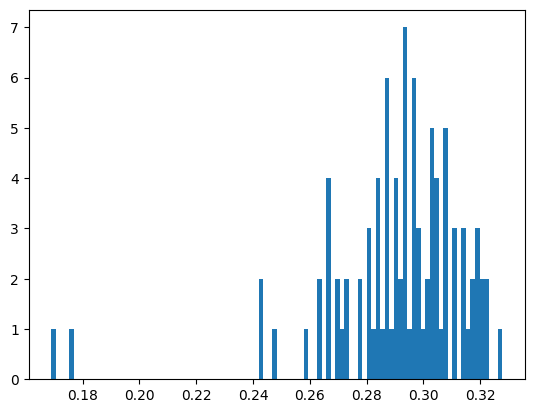

Marginal zone B cells


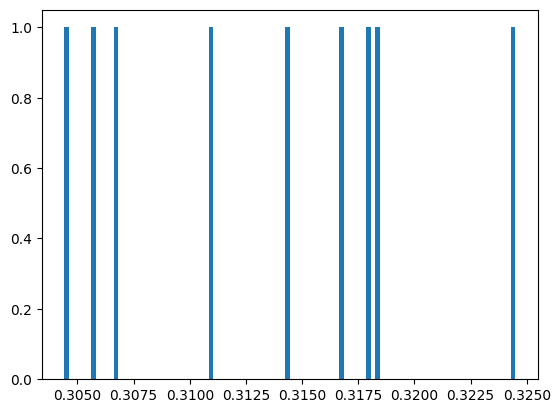

Follicular B cells


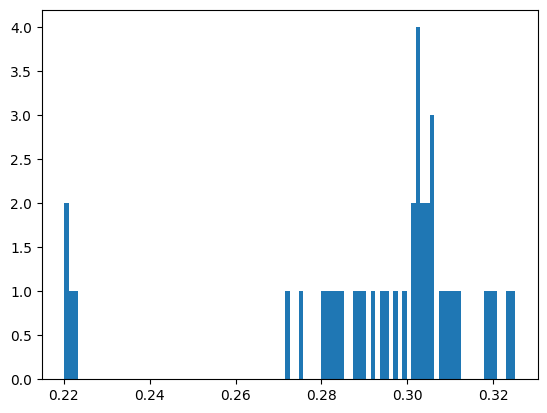

B220+ B cells


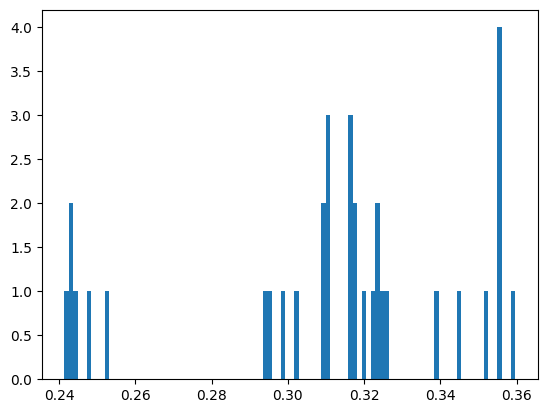

Primary B cells


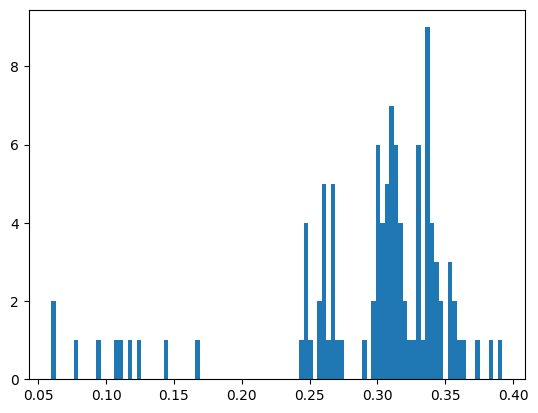

Immature B cells


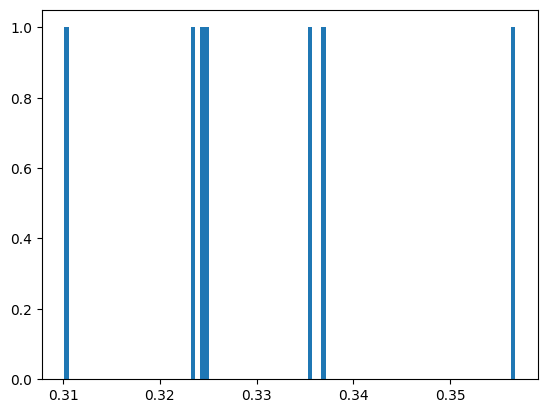

CH12 line


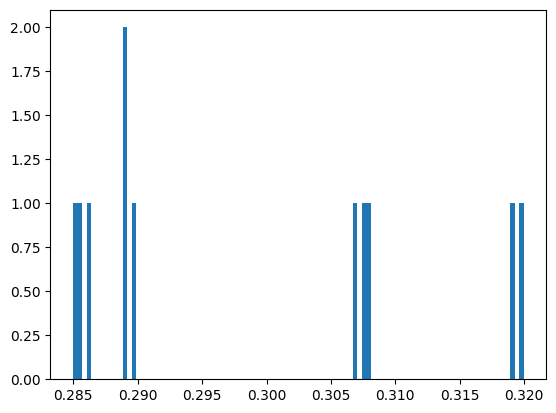

other B-cells


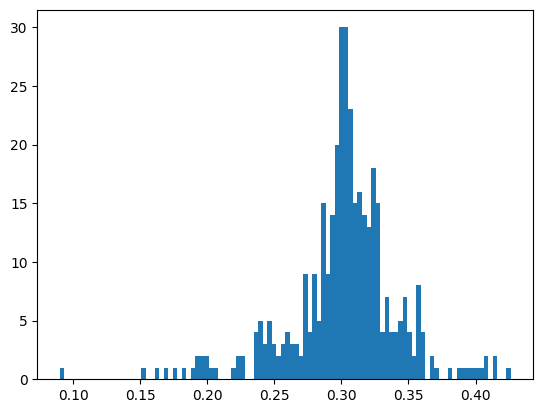

In [9]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    corr_log_cell_class(i)

CD8+ T cells


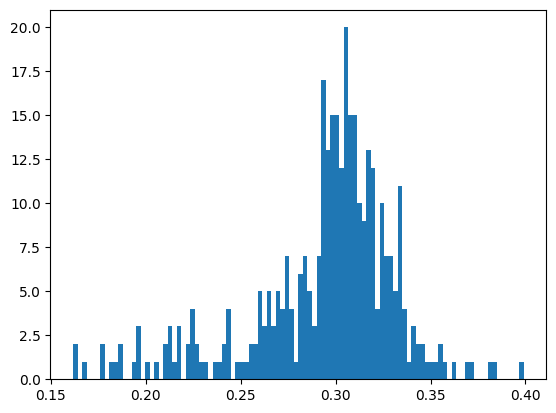

In [10]:
T_classes = ['CD8+ T cells']
for i in T_classes:
    corr_log_cell_class(i)

Bone Marrow Derived macrophages


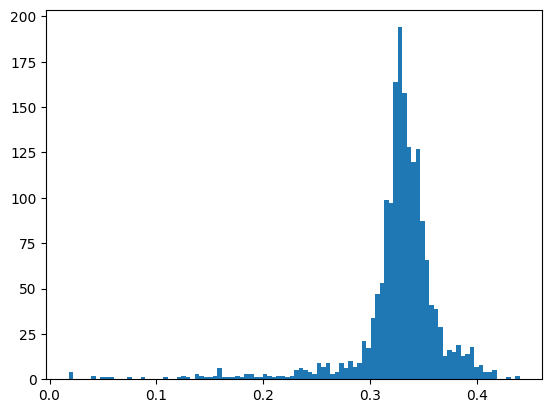

Peritoneal macrophage


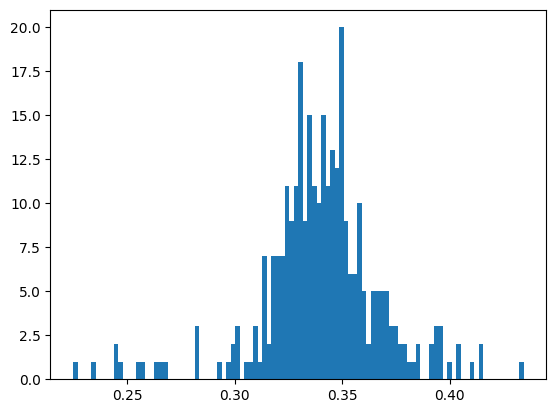

Alveolar macrophage


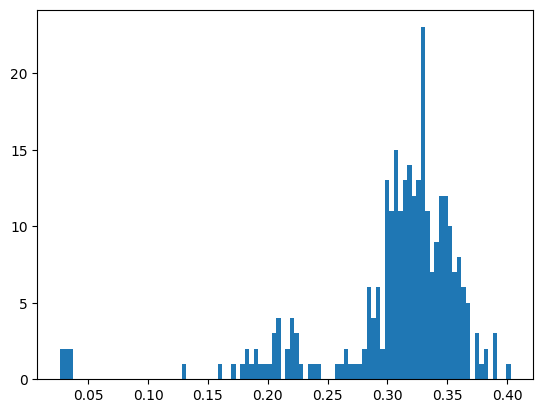

tumor macrophage


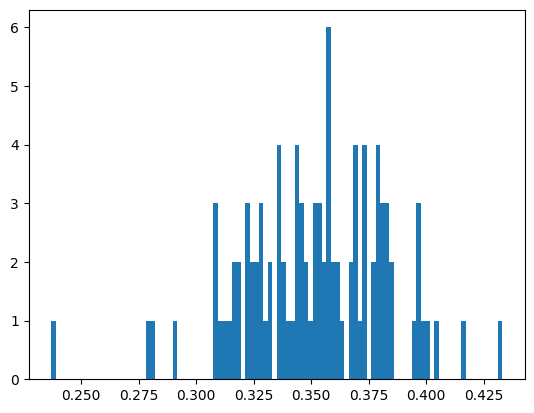

hepatic macrophages


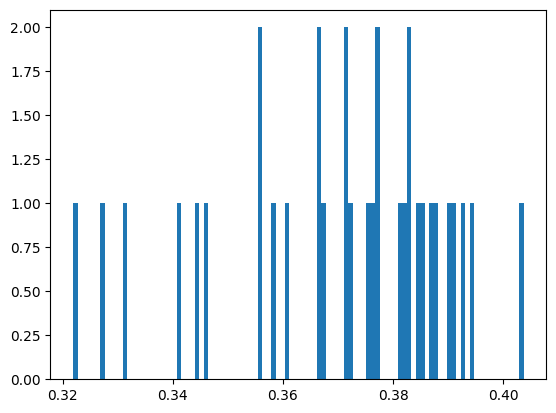

sciatic nerve macrophages


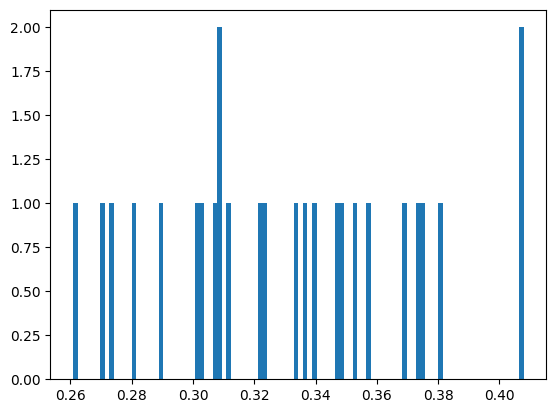

Phagocytic macrophages


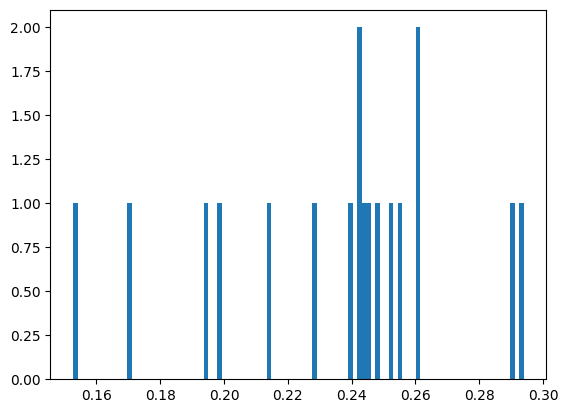

Peripheral macrophages


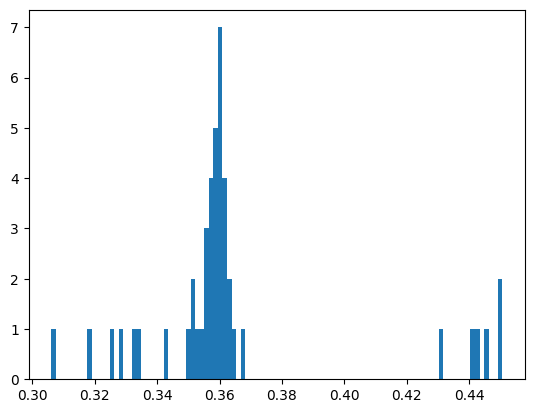

muscle macrophages


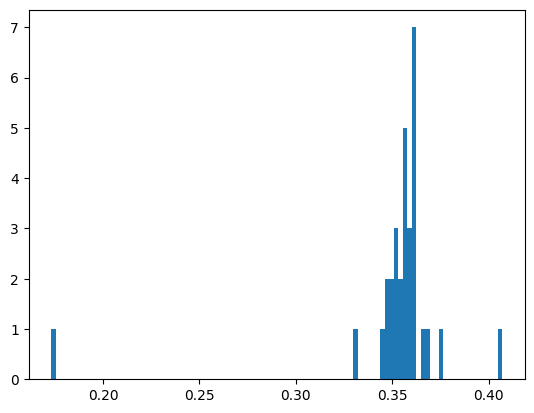

1 day after TBI macrophages


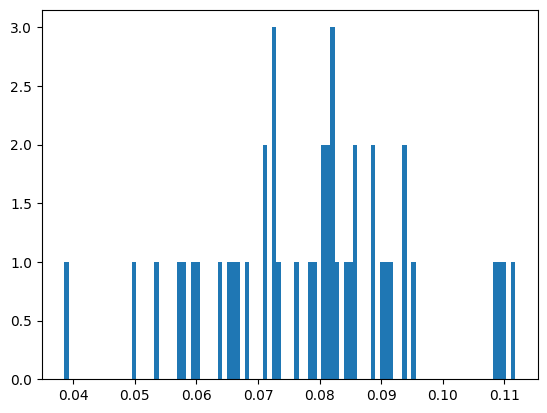

other macrophage


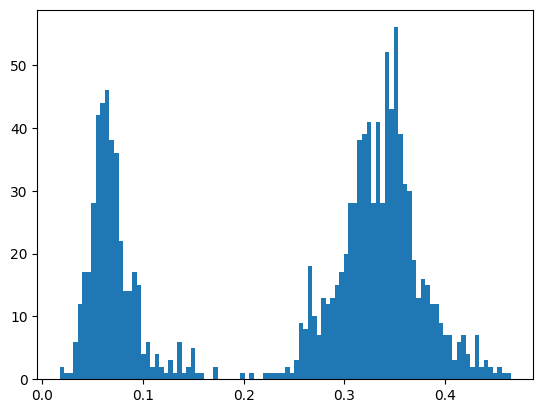

In [11]:
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_log_cell_class(i)

(array([ 2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
         0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  1.,  3.,  0.,  1.,  1.,  1.,  0.,  1.,  2.,  4.,  0.,
         1.,  1.,  0.,  0.,  3.,  4.,  2.,  1.,  2.,  4.,  9.,  9.,  9.,
         8.,  8.,  9., 13., 17., 13., 19., 12., 22., 24., 27., 37., 46.,
        49., 63., 61., 52., 41., 53., 49., 31., 30., 15., 18., 17.,  9.,
        12., 12., 11., 14.,  1.,  2.,  1.,  2.,  0.,  0.,  2.,  1.,  3.,
         1.,  1.,  1.,  3.,  0.,  2.,  0.,  0.,  1.]),
 array([0.0595814 , 0.06324849, 0.06691558, 0.07058267, 0.07424976,
        0.07791685, 0.08158393, 0.08525102, 0.08891811, 0.0925852 ,
        0.09625229, 0.09991938, 0.10358646, 0.10725355, 0.11092064,
        0.11458773, 0.11825482, 0.1219219 , 0.12558899, 0.12925608,
        0.13292317, 0.13659026, 0.14025735, 0.14392443, 0.14759152,
        0.15125861, 0.1549257 , 0.15859279, 0.16225988, 0.16592696,
        0.16959405, 0.1732

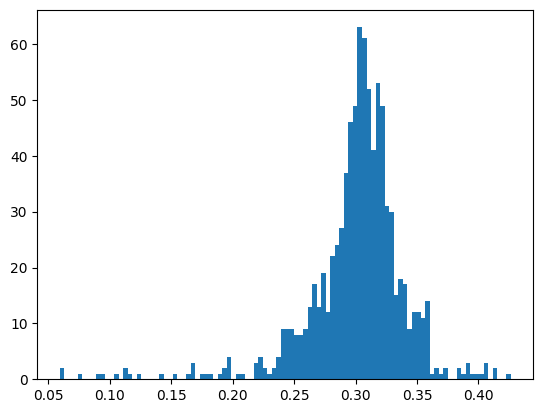

In [12]:
corr_log_cell_type('B_cells')

(array([ 2.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  2.,  0.,  0.,
         1.,  3.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  1.,  3.,  0.,  2.,
         4.,  2.,  1.,  1.,  0.,  1.,  1.,  2.,  4.,  0.,  1.,  1.,  1.,
         2.,  2.,  5.,  3.,  5.,  3.,  5.,  4.,  7.,  4.,  1.,  6.,  7.,
         5.,  3.,  7., 17., 13., 15., 15., 12., 20., 15., 15., 10.,  9.,
        13., 12.,  4., 10.,  7.,  7.,  5., 11.,  4.,  1.,  3.,  2.,  2.,
         1.,  1.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.16177865, 0.16415276, 0.16652687, 0.16890098, 0.17127509,
        0.1736492 , 0.17602331, 0.17839742, 0.18077153, 0.18314564,
        0.18551975, 0.18789386, 0.19026797, 0.19264208, 0.19501619,
        0.1973903 , 0.19976441, 0.20213852, 0.20451263, 0.20688674,
        0.20926085, 0.21163496, 0.21400907, 0.21638318, 0.21875729,
        0.2211314 , 0.22350551, 0.22587962, 0.22825373, 0.23062784,
        0.23300195, 0.2353

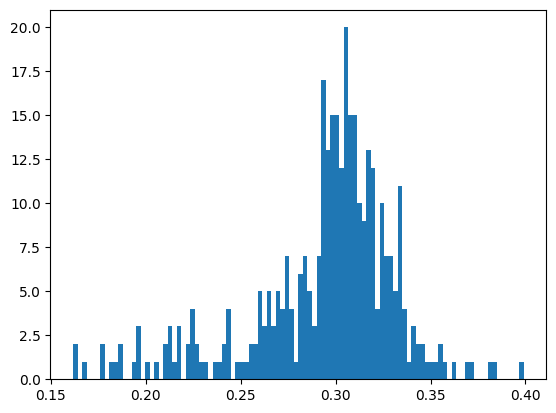

In [13]:
corr_log_cell_type('T_cells')

(array([  6.,   2.,   2.,  10.,  13.,  19.,  17.,  32.,  43.,  48.,  50.,
         41.,  41.,  25.,  24.,  19.,  21.,  17.,   4.,   6.,   6.,   5.,
          3.,   2.,   5.,   2.,   7.,   4.,   4.,   6.,   4.,   8.,   1.,
          1.,   6.,   2.,   6.,   3.,   6.,   2.,   6.,   4.,   5.,   4.,
          7.,   5.,   7.,   8.,  10.,   8.,  14.,   5.,  13.,  21.,  22.,
         25.,  20.,  17.,  29.,  27.,  30.,  38.,  51.,  68., 102., 101.,
        171., 187., 259., 280., 261., 200., 223., 217., 195., 143., 124.,
         95.,  60.,  45.,  51.,  54.,  30.,  37.,  37.,  16.,  21.,  10.,
         14.,  10.,   4.,   3.,   9.,   4.,   6.,   3.,   3.,   2.,   1.,
          1.]),
 array([0.01773579, 0.02221029, 0.0266848 , 0.0311593 , 0.0356338 ,
        0.0401083 , 0.0445828 , 0.0490573 , 0.0535318 , 0.05800631,
        0.06248081, 0.06695531, 0.07142981, 0.07590431, 0.08037881,
        0.08485331, 0.08932782, 0.09380232, 0.09827682, 0.10275132,
        0.10722582, 0.11170032, 0.11617482, 0.

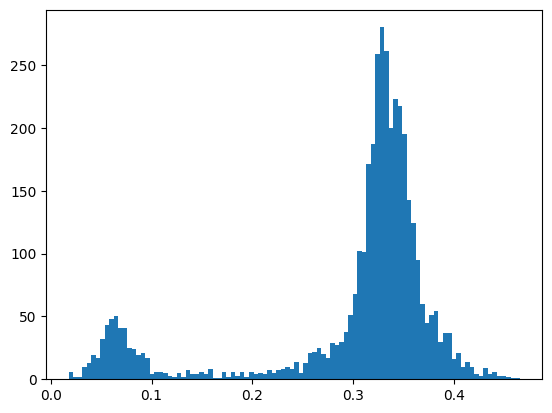

In [14]:
corr_log_cell_type('macrophage')

### Проведем нгормализацию по log(x+1) + quantile normalize

In [15]:
dee_norm_log=np.log(dee2+1)
exp_norm_log=np.log(exp2+1)

In [16]:
import qnorm # special module was installed for quantile normalization

In [17]:
dee_quant=qnorm.quantile_normalize(dee_norm_log, ncpus=4)
exp_quant=qnorm.quantile_normalize(exp_norm_log, ncpus=4)

(array([  2.,   0.,   4.,   1.,   2.,   7.,   3.,  11.,  16.,  23.,  24.,
         31.,  41.,  30.,  31.,  38.,  32.,  31.,  22.,  14.,  20.,  13.,
         20.,  11.,   7.,   5.,   6.,   7.,   2.,   2.,   2.,   4.,   2.,
          0.,   5.,   5.,   4.,   6.,   3.,   3.,   4.,   5.,   5.,   5.,
          3.,   5.,   2.,   5.,   7.,   7.,   7.,  14.,   4.,  10.,   8.,
         14.,  10.,  20.,  16.,  21.,  12.,  21.,  28.,  31.,  29.,  40.,
         53.,  47.,  65.,  58.,  91., 141., 185., 190., 208., 243., 224.,
        267., 320., 281., 269., 297., 299., 292., 212., 145., 129.,  88.,
         67.,  70.,  41.,  31.,  15.,   6.,   4.,   8.,   1.,   3.,   2.,
          3.]),
 array([0.01808302, 0.02191945, 0.02575588, 0.02959231, 0.03342875,
        0.03726518, 0.04110161, 0.04493804, 0.04877448, 0.05261091,
        0.05644734, 0.06028377, 0.0641202 , 0.06795664, 0.07179307,
        0.0756295 , 0.07946593, 0.08330237, 0.0871388 , 0.09097523,
        0.09481166, 0.0986481 , 0.10248453, 0.

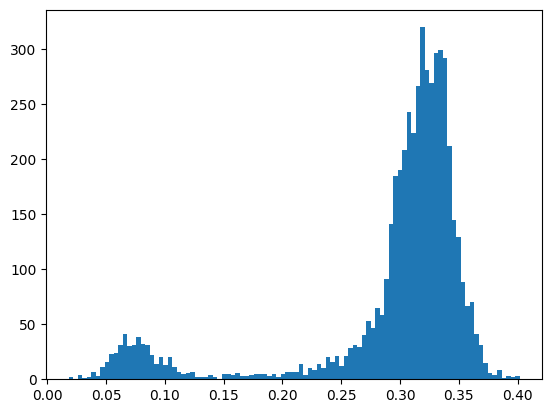

In [18]:
corr_quant=exp_quant.corrwith(dee_quant, axis=0, drop=False, method='pearson')
plt.hist(corr_quant, bins=100)

#### То жу самое,  но для разных групп клеток

In [19]:
def corr_quant_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp_quant.loc[:, exp_quant.columns.intersection(typ_geo)]
    dee_typ=dee_quant.loc[:, dee_quant.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='pearson')
    return print(typ), plt.hist(corr_typ, bins=100)
def corr_quant_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp_quant.loc[:, exp_quant.columns.intersection(cl_geo)]
    dee_cl=dee_quant.loc[:, dee_quant.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='pearson')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

splenic B cells


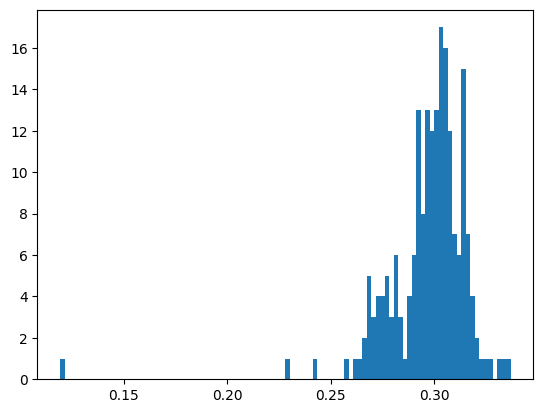

Germinal center B cells


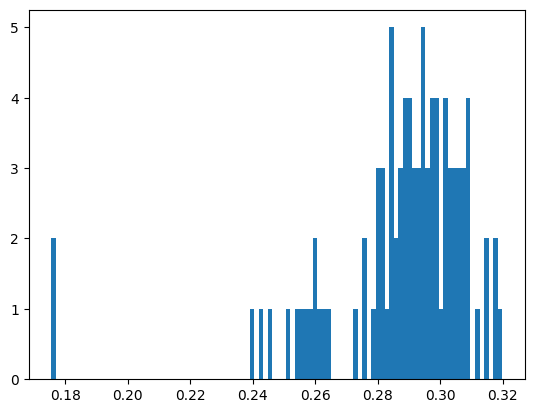

Marginal zone B cells


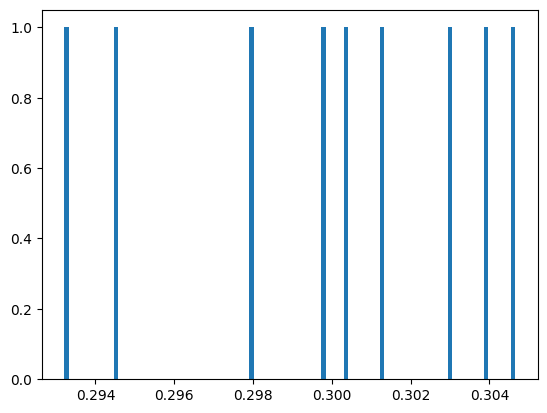

Follicular B cells


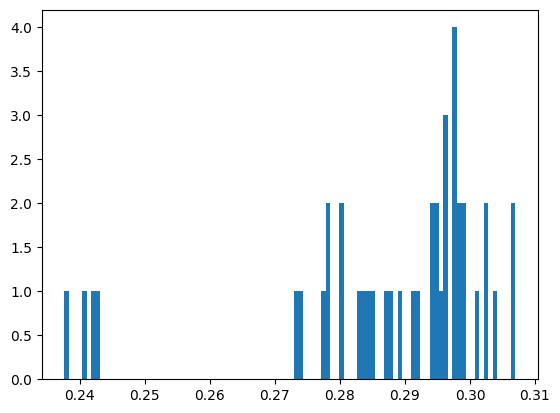

B220+ B cells


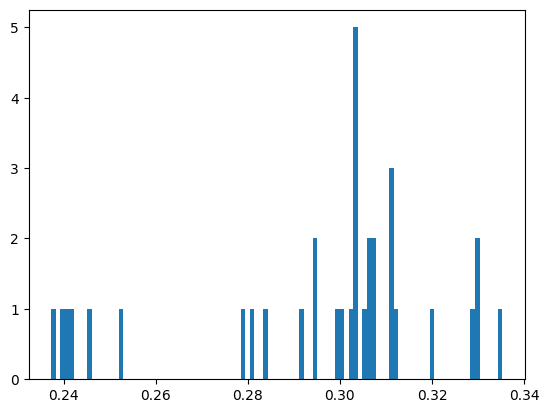

Primary B cells


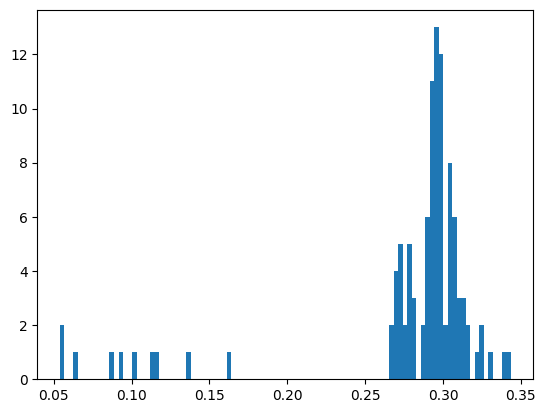

Immature B cells


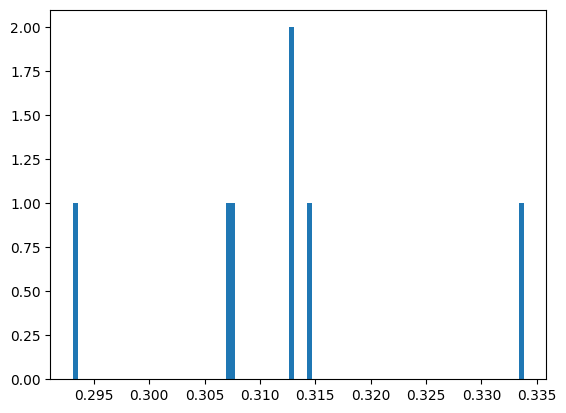

CH12 line


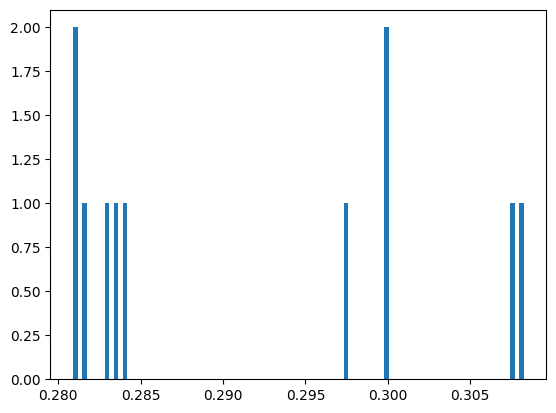

other B-cells


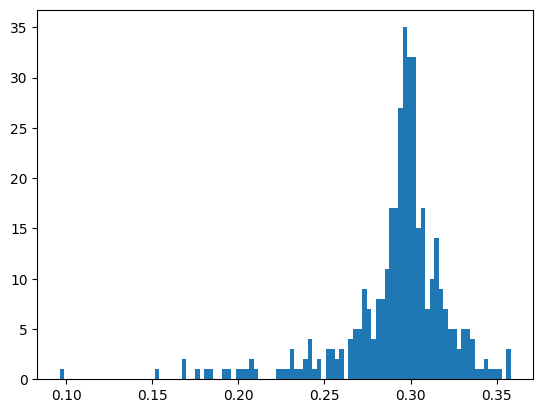

CD8+ T cells


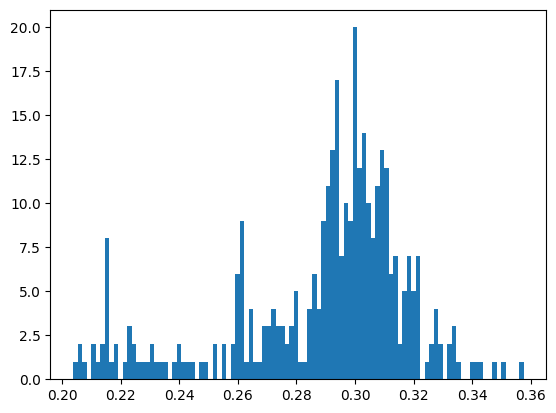

Bone Marrow Derived macrophages


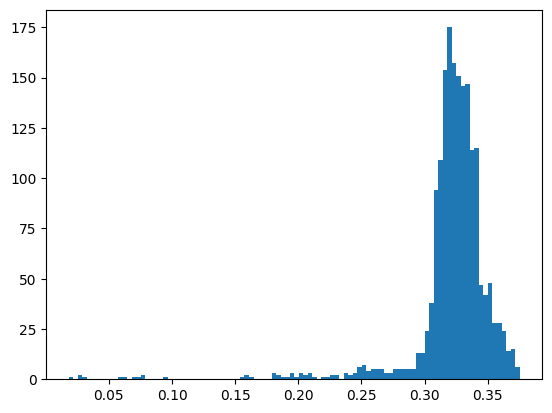

Peritoneal macrophage


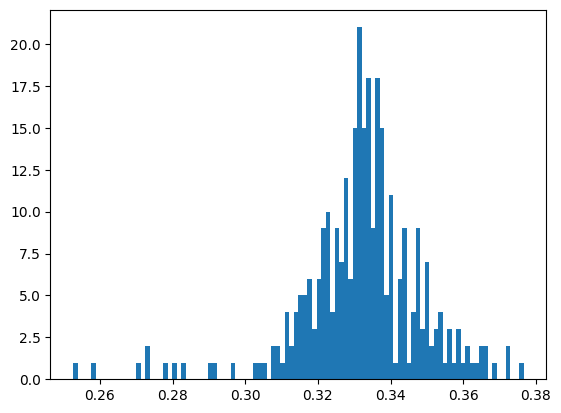

Alveolar macrophage


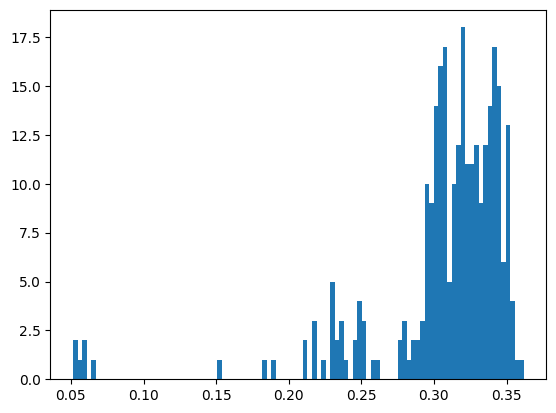

tumor macrophage


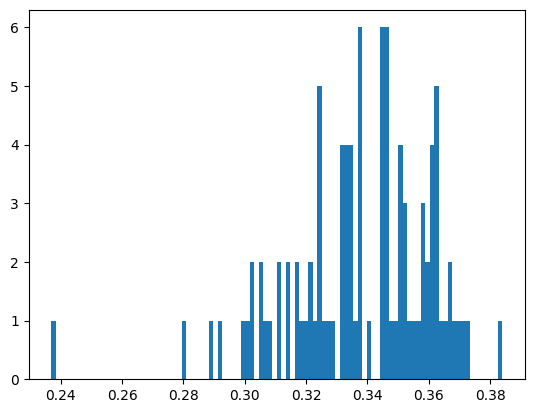

hepatic macrophages


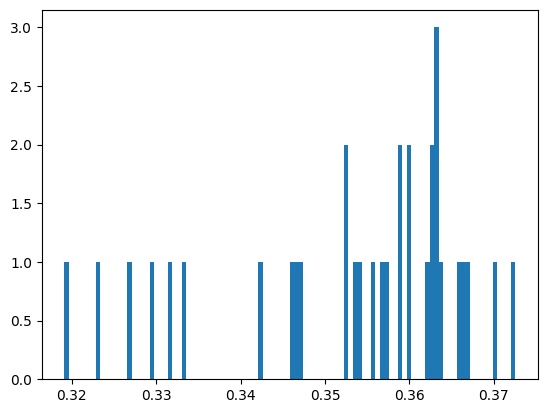

sciatic nerve macrophages


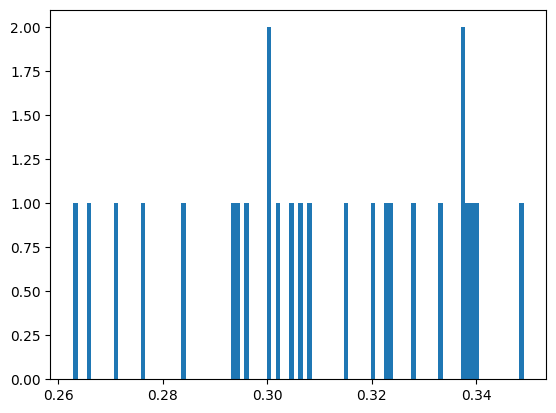

Phagocytic macrophages


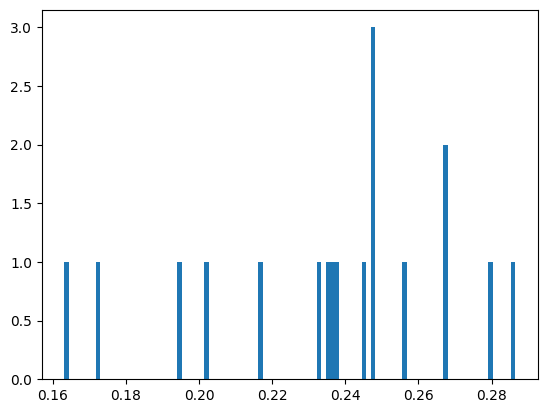

Peripheral macrophages


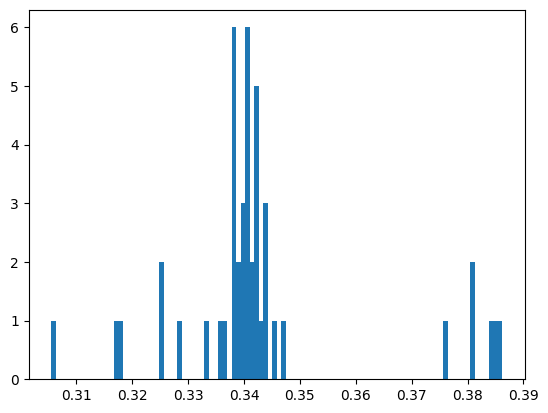

muscle macrophages


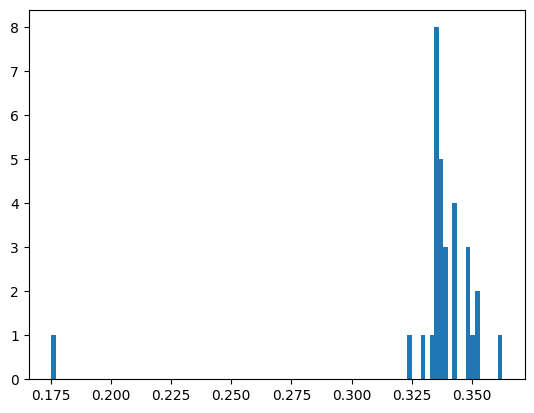

1 day after TBI macrophages


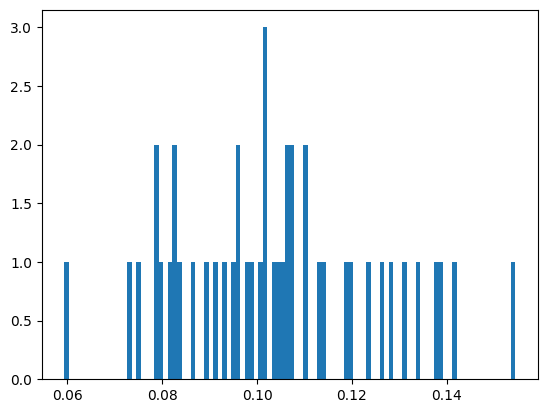

other macrophage


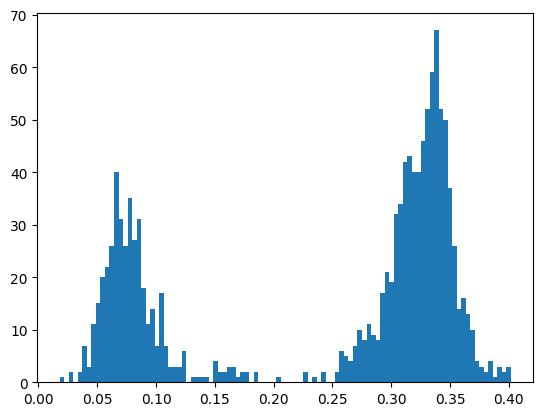

In [20]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    corr_quant_cell_class(i)
T_classes = ['CD8+ T cells']
for i in T_classes:
    corr_quant_cell_class(i)
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_quant_cell_class(i)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
3047          3047             0          19    GSM1356226    GPL13112   
3048          3048             1          76    GSM1119597    GPL13112   
3049          3049             2         106    GSM1533925    GPL13112   
3050          3050             3         240    GSM1808311    GPL13112   
3051          3051             4         274    GSM1823626    GPL13112   
...            ...           ...         ...           ...         ...   
9405          9405          6358      492513    GSM5550909    GPL19057   
9406          9406          6359      492636    GSM5558220    GPL21626   
9407          9407          6360      492637    GSM5558221    GPL21626   
9408          9408          6361      492638    GSM5558224    GPL21626   
9409          9409          6362      492639    GSM5558226    GPL21626   

       Cell_type                          Classes  \
3047  macrophage  Bone Marrow Derived macrophages   
3048 

(None,
 (array([  2.,   0.,   4.,   1.,   2.,   7.,   3.,  11.,  16.,  21.,  24.,
          31.,  40.,  30.,  31.,  38.,  32.,  30.,  22.,  13.,  19.,  12.,
          20.,  11.,   6.,   4.,   5.,   7.,   2.,   2.,   1.,   4.,   2.,
           0.,   4.,   5.,   4.,   5.,   3.,   1.,   4.,   2.,   4.,   4.,
           3.,   3.,   2.,   3.,   4.,   2.,   3.,   4.,   2.,   2.,   5.,
           6.,   7.,  10.,   2.,  15.,  10.,   9.,  15.,  12.,  12.,  12.,
          17.,  17.,  22.,  19.,  18.,  34.,  47.,  60.,  91., 142., 171.,
         212., 280., 264., 253., 285., 285., 287., 206., 143., 126.,  88.,
          63.,  70.,  41.,  31.,  15.,   6.,   4.,   8.,   1.,   3.,   2.,
           3.]),
  array([0.01808302, 0.02191945, 0.02575588, 0.02959231, 0.03342875,
         0.03726518, 0.04110161, 0.04493804, 0.04877448, 0.05261091,
         0.05644734, 0.06028377, 0.0641202 , 0.06795664, 0.07179307,
         0.0756295 , 0.07946593, 0.08330237, 0.0871388 , 0.09097523,
         0.09481166, 0.09

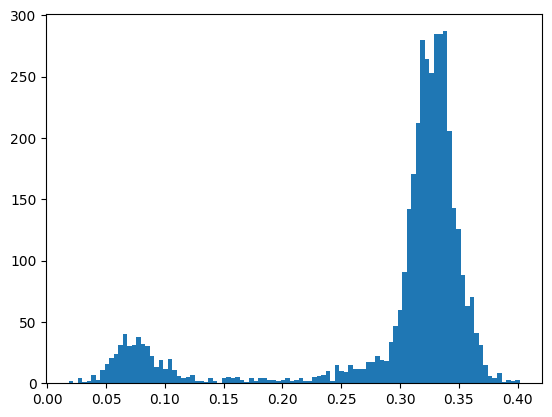

In [21]:
corr_quant_cell_type('macrophage')

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
0                0             0          28    GSM1849922    GPL13112   
1                1             1          38    GSM1897413    GPL13112   
2                2             2         334    GSM1849954    GPL13112   
3                3             3         341    GSM1229014    GPL13112   
4                4             4         570    GSM1234739    GPL13112   
...            ...           ...         ...           ...         ...   
1630          1630          1630      486647    GSM5471760    GPL24247   
1631          1631          1631      488893    GSM5481979    GPL21626   
1632          1632          1632      488894    GSM5481980    GPL21626   
1633          1633          1633      488895    GSM5481981    GPL21626   
1634          1634          1634      488896    GSM5481982    GPL21626   

     Cell_type             Classes                source_name_ch1  
0      B_cells       other B-cells         

(None,
 (array([ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,
          1.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  1.,
          0.,  0.,  0.,  1.,  1.,  2.,  4.,  0.,  5., 12.,  2.,  4.,  1.,
          7.,  6.,  4.,  5., 10., 14., 18., 25., 18., 32., 28., 29., 44.,
         63., 84., 91., 77., 59., 55., 22., 42., 24., 14., 11.,  6.,  7.,
          9.,  7.,  3.,  2.,  2.,  1.,  2.,  0.,  3.]),
  array([0.05396292, 0.05700542, 0.06004792, 0.06309041, 0.06613291,
         0.0691754 , 0.0722179 , 0.0752604 , 0.07830289, 0.08134539,
         0.08438788, 0.08743038, 0.09047288, 0.09351537, 0.09655787,
         0.09960036, 0.10264286, 0.10568536, 0.10872785, 0.11177035,
         0.11481284, 0.11785534, 0.12089784, 0.12394033, 0.12698283,
         0.13002532, 0.13306782, 0.13611032, 0.13915281, 0.14219531,
     

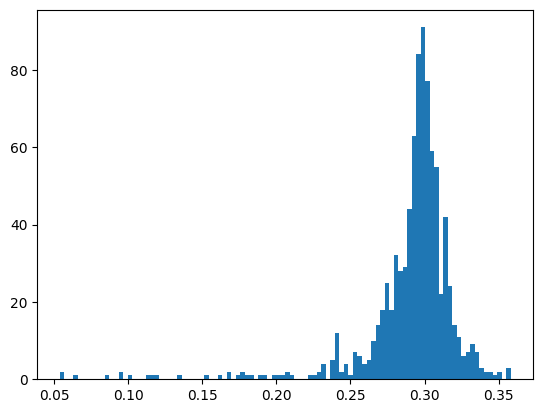

In [22]:
corr_quant_cell_type('B_cells')


      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
1635          1635             0          64    GSM1262088    GPL13112   
1636          1636             1         183    GSM1511235    GPL13112   
1637          1637             2         279    GSM1713923    GPL13112   
1638          1638             3         397    GSM1703629    GPL13112   
1639          1639             4         773    GSM1543815    GPL13112   
...            ...           ...         ...           ...         ...   
3042          3042          1407      491895    GSM5534285    GPL19057   
3043          3043          1408      491896    GSM5534286    GPL19057   
3044          3044          1409      492642    GSM5560174    GPL19057   
3045          3045          1410      492643    GSM5560175    GPL19057   
3046          3046          1411      492644    GSM5560176    GPL19057   

     Cell_type       Classes                              source_name_ch1  
1635   T_cells  CD4+ T cells       

(None,
 (array([ 1.,  2.,  1.,  0.,  2.,  1.,  2.,  8.,  1.,  2.,  0.,  1.,  3.,
          2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  1.,
          1.,  0.,  1.,  1.,  0.,  2.,  0.,  2.,  0.,  2.,  6.,  9.,  1.,
          4.,  1.,  1.,  3.,  3.,  4.,  3.,  3.,  2.,  3.,  5.,  1.,  1.,
          4.,  6.,  4.,  9., 11., 13., 17.,  7., 10.,  9., 20., 12., 14.,
         10.,  8., 11., 13., 12.,  6.,  7.,  2.,  5.,  7.,  5.,  7.,  0.,
          1.,  2.,  4.,  2.,  0.,  2.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,
          0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
  array([0.20370958, 0.20524925, 0.20678892, 0.20832858, 0.20986825,
         0.21140791, 0.21294758, 0.21448724, 0.21602691, 0.21756658,
         0.21910624, 0.22064591, 0.22218557, 0.22372524, 0.2252649 ,
         0.22680457, 0.22834424, 0.2298839 , 0.23142357, 0.23296323,
         0.2345029 , 0.23604256, 0.23758223, 0.2391219 , 0.24066156,
         0.24220123, 0.24374089, 0.24528056, 0.24682022, 0.24835989,
     

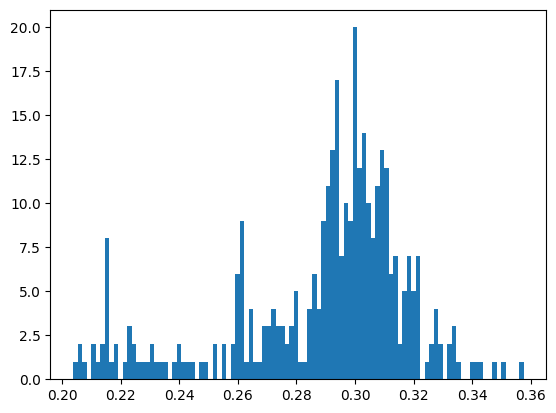

In [23]:
corr_quant_cell_type('T_cells')

## Составим топ 12 000 генов по экспрессии (по средним значениям экспрессии для всех сэмплов)

In [24]:
gt=pd.read_csv('great_table2.csv')
dee = pd.read_csv('dee_cross.csv')
exp = pd.read_csv('exp_cross.csv')
dee2=dee.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)
exp2=exp.drop(columns = ['ensemble','symbol', 'Unnamed: 0'],axis = 1)

#### Считаем средние значения экспресси генов по всем сэмплам

In [25]:
exp_mean=exp2.mean(axis=1)
print(exp_mean.head(2))
print(exp2.head(2))

0    3721.113729
1       0.057926
dtype: float64
   GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
0        5567        5857        4467        5325        6059        5579   
1           0           0           0           0           0           0   

   GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  GSM951561  \
0        4753        5581        4557        3708  ...        730       1378   
1           0           0           0           0  ...          0          0   

   GSM951562  GSM951563  GSM951564  GSM951565  GSM951566  GSM951567  \
0       1090       1446       2473       2214       2912       6433   
1          0          0          0          0          0          0   

   GSM951568  GSM988446  
0       3521          0  
1          0          4  

[2 rows x 5179 columns]


#### Вставляем эту колонку в исходную таблицу и сортируем по столюцу со средними значениями

In [28]:
exp2.insert(0, 'mean', exp_mean)


In [29]:
exp_sorted=exp2.sort_values('mean',axis=0, ascending=False)
print(exp_sorted.head(10))

                mean  GSM1026888  GSM1026889  GSM1026890  GSM1026891  \
17518  238499.998455      485635      465667      422262      580519   
16925  180261.639313      107520       95913       88134       92264   
3270   178450.227457       65314       44384       51415       55724   
14163  175580.819270       98994       80482       89209       85969   
4448   172602.154277       25160       23085       24762       32951   
666    161655.645491       75355       61707       65796       80946   
10427  155560.687005      132325      118289      111300      153475   
9598   145901.511489        2002        1740        1627        1843   
1108   139822.102336       63243       49667       51446       59150   
7119   139820.384244      122268      125459       85172      119736   

       GSM1026892  GSM1026893  GSM1026894  GSM1026895  GSM1026896  ...  \
17518      639612      600192      519753      463154      369466  ...   
16925       85326      109415       83765      105613      

#### Оставялем только топ 12 000 и удаляем колонку mean

In [30]:
exp_sorted=exp_sorted.head(12000)

In [31]:
print(exp_sorted.head(10))

                mean  GSM1026888  GSM1026889  GSM1026890  GSM1026891  \
17518  238499.998455      485635      465667      422262      580519   
16925  180261.639313      107520       95913       88134       92264   
3270   178450.227457       65314       44384       51415       55724   
14163  175580.819270       98994       80482       89209       85969   
4448   172602.154277       25160       23085       24762       32951   
666    161655.645491       75355       61707       65796       80946   
10427  155560.687005      132325      118289      111300      153475   
9598   145901.511489        2002        1740        1627        1843   
1108   139822.102336       63243       49667       51446       59150   
7119   139820.384244      122268      125459       85172      119736   

       GSM1026892  GSM1026893  GSM1026894  GSM1026895  GSM1026896  ...  \
17518      639612      600192      519753      463154      369466  ...   
16925       85326      109415       83765      105613      

In [32]:
exp_sorted=exp_sorted.drop(columns = ['mean'],axis = 1)

#### Получем список инндексов генов из топа и создаем на его основе новую таблицу exp  с теми же генами

In [33]:
index_list = exp_sorted.index.values.tolist ()
print(index_list[0:10])

[17518, 16925, 3270, 14163, 4448, 666, 10427, 9598, 1108, 7119]


1. .iloc выбирает строки на основе целочисленного индекса.Итак, если вы хотите выбрать 5-ю строку в DataFrame, вы должны использовать df.iloc[[4]], так как первая строка имеет индекс 0, вторая строка имеет индекс 1 и так далее.
2. .loc выбирает строки на основе помеченного индекса.Итак, если вы хотите выбрать строку с меткой индекса 5, вы должны напрямую использовать df.loc[[5]].


In [35]:
dee_sorted=dee2.loc[index_list]
print(dee_sorted.head(5))
print(exp_sorted.head(5))

       GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
17518         401         275        1214         505         616         398   
16925          11          18           9          10          17          20   
3270          119         115         138         167         189         192   
14163          25          13          10          29          31          15   
4448            0           1           0           0           0           0   

       GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  \
17518         274         253         468         556  ...         64   
16925          12          11          13          12  ...        224   
3270          142         147         121         160  ...        205   
14163          32          14          24          34  ...          7   
4448            0           0           0           0  ...          1   

       GSM951561  GSM951562  GSM951563  GSM951564  GSM951565  GSM951566  \

### Теперь построим графики для нормализованных данных для 12000 топ генов

#### Нормализация по логарифму и квантилю

In [36]:
dee_sorted_log=np.log(dee_sorted+1)
exp_sorted_log=np.log(exp_sorted+1)
dee_sorted_quant=qnorm.quantile_normalize(dee_sorted_log, ncpus=4)
exp_sorted_quant=qnorm.quantile_normalize(exp_sorted_log, ncpus=4)



In [37]:
dee_top=dee_sorted_quant.sort_index()
exp_top=exp_sorted_quant.sort_index()
print(exp_top.head(10))

    GSM1026888  GSM1026889  GSM1026890  GSM1026891  GSM1026892  GSM1026893  \
0     8.167813    8.331458    8.106141    8.097824    8.005443    8.052264   
2     2.287524    3.503252    2.213758    3.625512    3.818085    4.198968   
5     6.128221    6.020285    6.092355    5.702577    5.625131    5.921755   
6     6.409646    6.357321    5.794789    6.094872    6.120329    5.857673   
7     7.723520    7.569822    7.657317    7.339924    7.135711    7.224904   
8     5.829389    5.655522    5.703255    5.573368    5.645378    5.758401   
9     5.760589    5.984241    5.933726    5.887916    6.362472    6.062384   
16    5.557333    5.615290    5.468670    5.338643    5.290458    5.352408   
17    7.320891    7.269160    7.188116    7.277724    7.442052    7.281592   
18    7.462809    7.410007    7.477356    7.546336    7.617170    7.486305   

    GSM1026894  GSM1026895  GSM1026896  GSM1026897  ...  GSM951560  GSM951561  \
0     8.059192    8.303370    8.135283    7.874221  ...   6.

(array([  2.,   1.,   1.,   2.,   5.,   4.,   3.,   9.,  10.,  12.,  18.,
         17.,  22.,  24.,  34.,  27.,  35.,  43.,  28.,  31.,  29.,  28.,
         22.,  27.,  26.,  26.,  19.,  16.,  22.,  25.,  24.,  23.,  32.,
         31.,  45.,  46.,  40.,  53.,  60.,  72.,  80.,  81.,  72.,  85.,
         93.,  98., 112., 111.,  94.,  77.,  80.,  80.,  98.,  77., 107.,
        120., 112., 144., 176., 175., 191., 211., 204., 212., 202., 180.,
        131., 150., 124., 121.,  76.,  63.,  48.,  47.,  34.,  19.,  16.,
         13.,   8.,   7.,   7.,   7.,   9.,   7.,   7.,   5.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   2.,   1.,
          2.]),
 array([-0.01650905, -0.01495963, -0.0134102 , -0.01186078, -0.01031135,
        -0.00876193, -0.00721251, -0.00566308, -0.00411366, -0.00256423,
        -0.00101481,  0.00053462,  0.00208404,  0.00363347,  0.00518289,
         0.00673232,  0.00828174,  0.00983117,  0.01138059,  0.01293002,
         0.01447944,  0.01

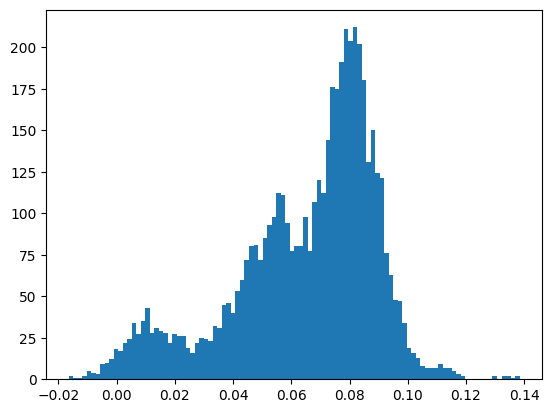

In [38]:
corr_top=exp_top.corrwith(dee_top, axis=0, drop=False, method='pearson')
plt.hist(corr_top, bins=100)

In [39]:
def corr_top_cell_type(typ):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    exp_typ=exp_quant.loc[:, exp_quant.columns.intersection(typ_geo)]
    dee_typ=dee_quant.loc[:, dee_quant.columns.intersection(typ_geo)]
    corr_typ=exp_typ.corrwith(dee_typ, axis=0, drop=False, method='pearson')
    return print(typ), plt.hist(corr_typ, bins=100)
def corr_top_cell_class(cla):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    exp_cl=exp_top.loc[:, exp_top.columns.intersection(cl_geo)]
    dee_cl=dee_top.loc[:, dee_top.columns.intersection(cl_geo)]
    corr_cl=exp_cl.corrwith(dee_cl, axis=0, drop=False, method='pearson')
    plt.hist(corr_cl, bins=100)
    return print(cla), plt.show()

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
1635          1635             0          64    GSM1262088    GPL13112   
1636          1636             1         183    GSM1511235    GPL13112   
1637          1637             2         279    GSM1713923    GPL13112   
1638          1638             3         397    GSM1703629    GPL13112   
1639          1639             4         773    GSM1543815    GPL13112   
...            ...           ...         ...           ...         ...   
3042          3042          1407      491895    GSM5534285    GPL19057   
3043          3043          1408      491896    GSM5534286    GPL19057   
3044          3044          1409      492642    GSM5560174    GPL19057   
3045          3045          1410      492643    GSM5560175    GPL19057   
3046          3046          1411      492644    GSM5560176    GPL19057   

     Cell_type       Classes                              source_name_ch1  
1635   T_cells  CD4+ T cells       

(None,
 (array([ 1.,  2.,  1.,  0.,  2.,  1.,  2.,  8.,  1.,  2.,  0.,  1.,  3.,
          2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  1.,
          1.,  0.,  1.,  1.,  0.,  2.,  0.,  2.,  0.,  2.,  6.,  9.,  1.,
          4.,  1.,  1.,  3.,  3.,  4.,  3.,  3.,  2.,  3.,  5.,  1.,  1.,
          4.,  6.,  4.,  9., 11., 13., 17.,  7., 10.,  9., 20., 12., 14.,
         10.,  8., 11., 13., 12.,  6.,  7.,  2.,  5.,  7.,  5.,  7.,  0.,
          1.,  2.,  4.,  2.,  0.,  2.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,
          0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
  array([0.20370958, 0.20524925, 0.20678892, 0.20832858, 0.20986825,
         0.21140791, 0.21294758, 0.21448724, 0.21602691, 0.21756658,
         0.21910624, 0.22064591, 0.22218557, 0.22372524, 0.2252649 ,
         0.22680457, 0.22834424, 0.2298839 , 0.23142357, 0.23296323,
         0.2345029 , 0.23604256, 0.23758223, 0.2391219 , 0.24066156,
         0.24220123, 0.24374089, 0.24528056, 0.24682022, 0.24835989,
     

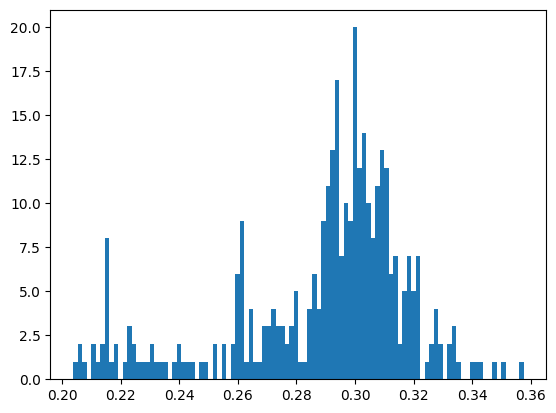

In [40]:
corr_top_cell_type('T_cells')


      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
3047          3047             0          19    GSM1356226    GPL13112   
3048          3048             1          76    GSM1119597    GPL13112   
3049          3049             2         106    GSM1533925    GPL13112   
3050          3050             3         240    GSM1808311    GPL13112   
3051          3051             4         274    GSM1823626    GPL13112   
...            ...           ...         ...           ...         ...   
9405          9405          6358      492513    GSM5550909    GPL19057   
9406          9406          6359      492636    GSM5558220    GPL21626   
9407          9407          6360      492637    GSM5558221    GPL21626   
9408          9408          6361      492638    GSM5558224    GPL21626   
9409          9409          6362      492639    GSM5558226    GPL21626   

       Cell_type                          Classes  \
3047  macrophage  Bone Marrow Derived macrophages   
3048 

(None,
 (array([  2.,   0.,   4.,   1.,   2.,   7.,   3.,  11.,  16.,  21.,  24.,
          31.,  40.,  30.,  31.,  38.,  32.,  30.,  22.,  13.,  19.,  12.,
          20.,  11.,   6.,   4.,   5.,   7.,   2.,   2.,   1.,   4.,   2.,
           0.,   4.,   5.,   4.,   5.,   3.,   1.,   4.,   2.,   4.,   4.,
           3.,   3.,   2.,   3.,   4.,   2.,   3.,   4.,   2.,   2.,   5.,
           6.,   7.,  10.,   2.,  15.,  10.,   9.,  15.,  12.,  12.,  12.,
          17.,  17.,  22.,  19.,  18.,  34.,  47.,  60.,  91., 142., 171.,
         212., 280., 264., 253., 285., 285., 287., 206., 143., 126.,  88.,
          63.,  70.,  41.,  31.,  15.,   6.,   4.,   8.,   1.,   3.,   2.,
           3.]),
  array([0.01808302, 0.02191945, 0.02575588, 0.02959231, 0.03342875,
         0.03726518, 0.04110161, 0.04493804, 0.04877448, 0.05261091,
         0.05644734, 0.06028377, 0.0641202 , 0.06795664, 0.07179307,
         0.0756295 , 0.07946593, 0.08330237, 0.0871388 , 0.09097523,
         0.09481166, 0.09

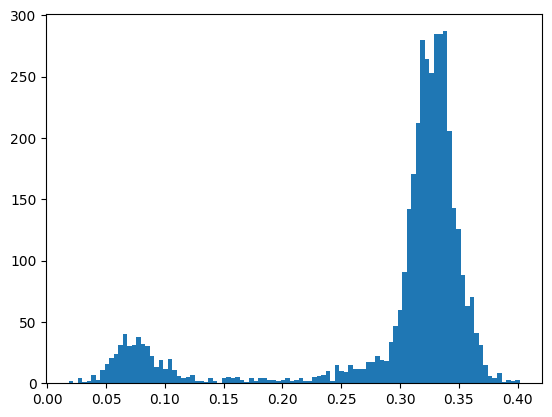

In [41]:

corr_top_cell_type('macrophage')

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
0                0             0          28    GSM1849922    GPL13112   
1                1             1          38    GSM1897413    GPL13112   
2                2             2         334    GSM1849954    GPL13112   
3                3             3         341    GSM1229014    GPL13112   
4                4             4         570    GSM1234739    GPL13112   
...            ...           ...         ...           ...         ...   
1630          1630          1630      486647    GSM5471760    GPL24247   
1631          1631          1631      488893    GSM5481979    GPL21626   
1632          1632          1632      488894    GSM5481980    GPL21626   
1633          1633          1633      488895    GSM5481981    GPL21626   
1634          1634          1634      488896    GSM5481982    GPL21626   

     Cell_type             Classes                source_name_ch1  
0      B_cells       other B-cells         

(None,
 (array([ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,
          1.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  1.,
          0.,  0.,  0.,  1.,  1.,  2.,  4.,  0.,  5., 12.,  2.,  4.,  1.,
          7.,  6.,  4.,  5., 10., 14., 18., 25., 18., 32., 28., 29., 44.,
         63., 84., 91., 77., 59., 55., 22., 42., 24., 14., 11.,  6.,  7.,
          9.,  7.,  3.,  2.,  2.,  1.,  2.,  0.,  3.]),
  array([0.05396292, 0.05700542, 0.06004792, 0.06309041, 0.06613291,
         0.0691754 , 0.0722179 , 0.0752604 , 0.07830289, 0.08134539,
         0.08438788, 0.08743038, 0.09047288, 0.09351537, 0.09655787,
         0.09960036, 0.10264286, 0.10568536, 0.10872785, 0.11177035,
         0.11481284, 0.11785534, 0.12089784, 0.12394033, 0.12698283,
         0.13002532, 0.13306782, 0.13611032, 0.13915281, 0.14219531,
     

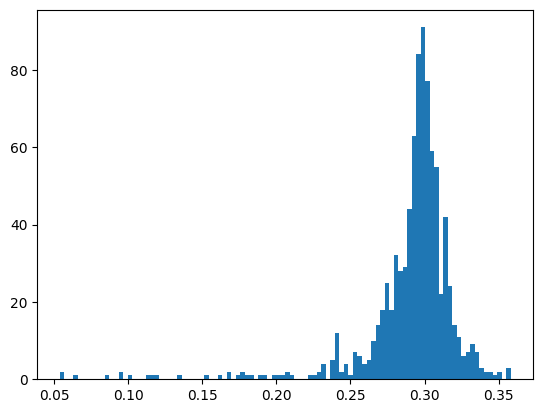

In [42]:
corr_top_cell_type('B_cells')


splenic B cells


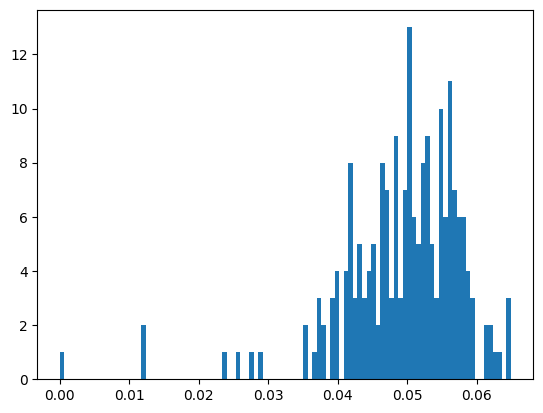

Germinal center B cells


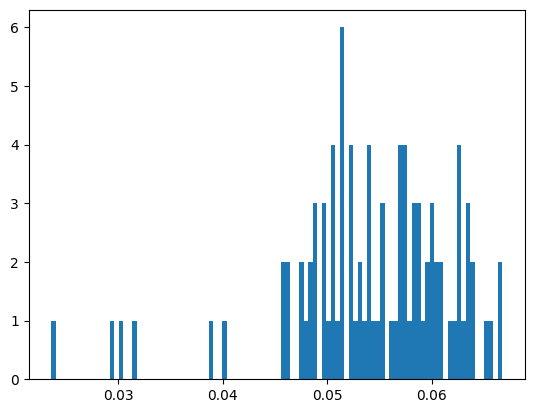

Marginal zone B cells


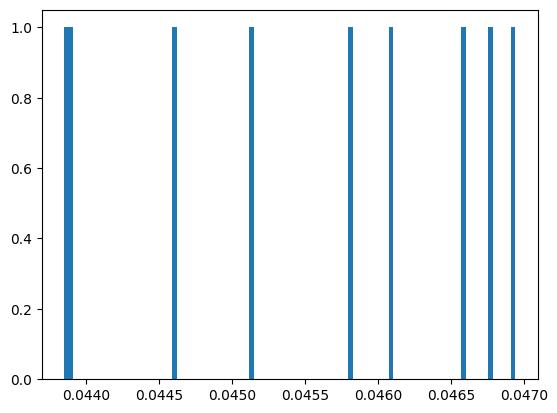

Follicular B cells


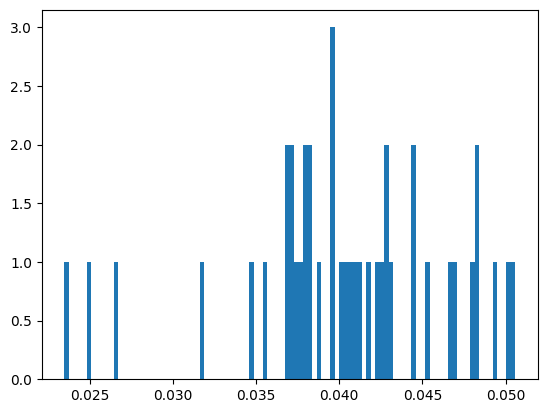

B220+ B cells


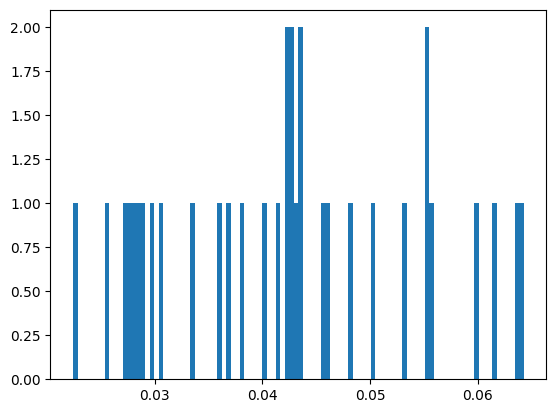

Primary B cells


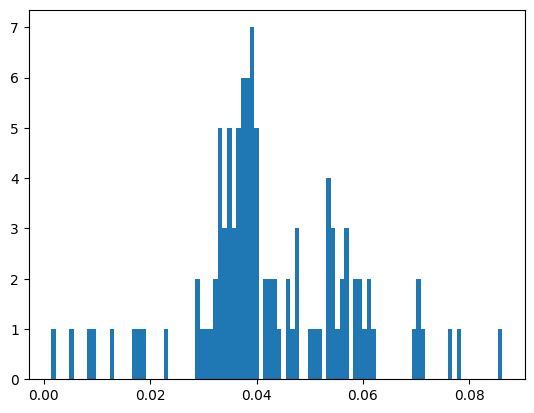

Immature B cells


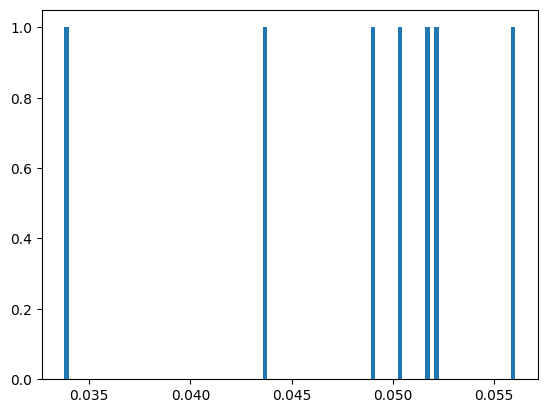

CH12 line


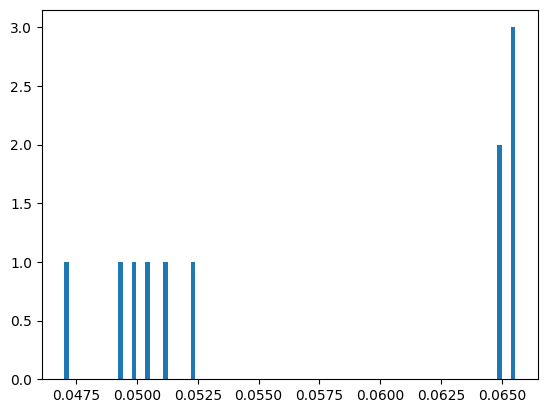

other B-cells


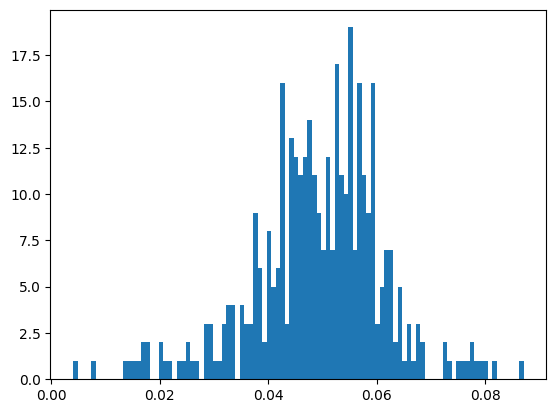

CD8+ T cells


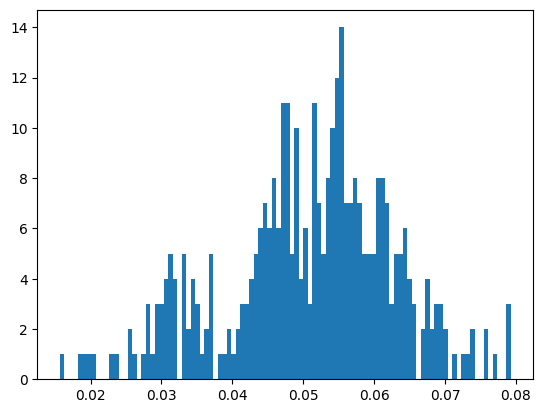

Bone Marrow Derived macrophages


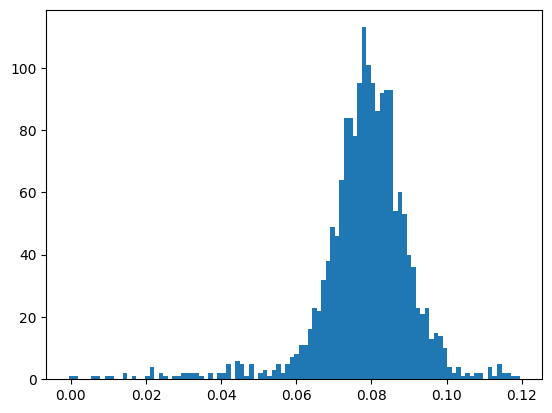

Peritoneal macrophage


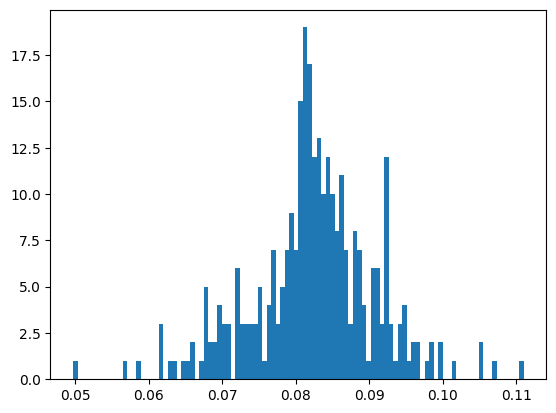

Alveolar macrophage


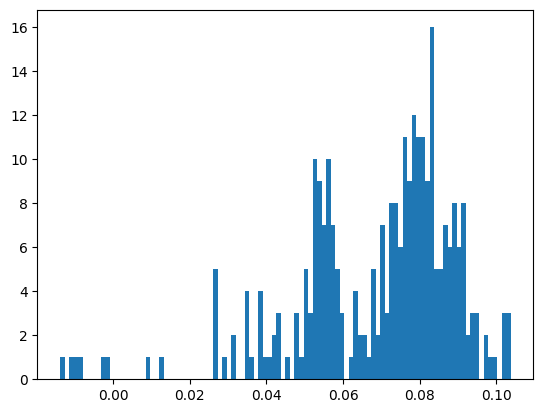

tumor macrophage


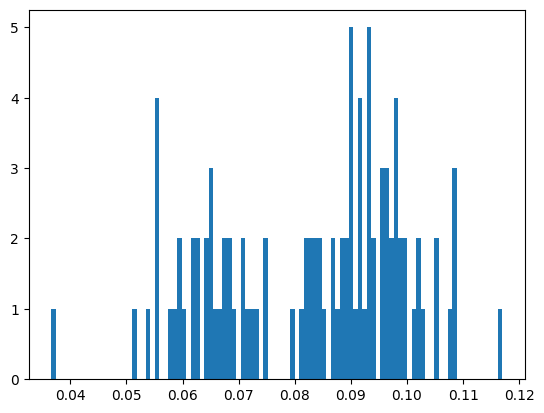

hepatic macrophages


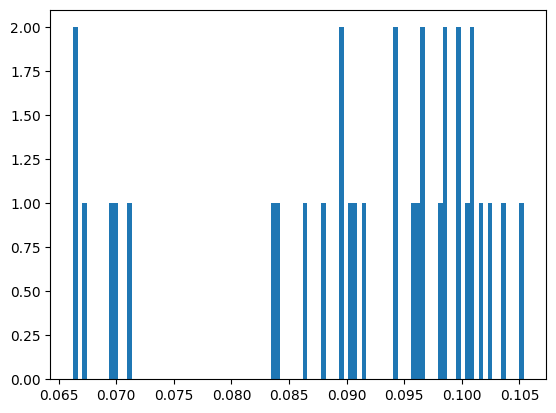

sciatic nerve macrophages


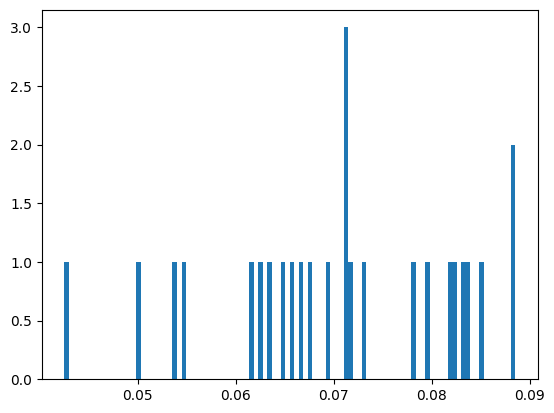

Phagocytic macrophages


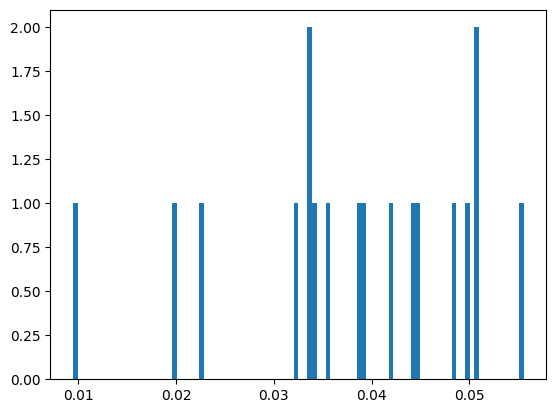

Peripheral macrophages


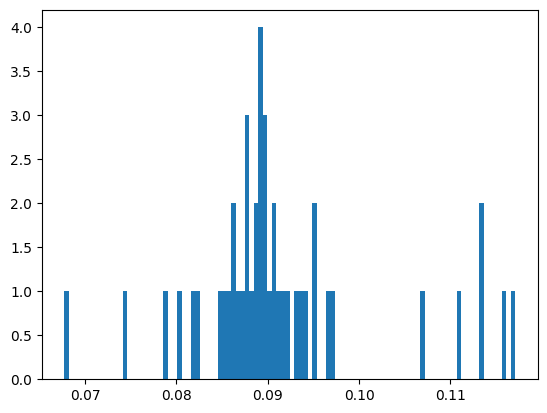

muscle macrophages


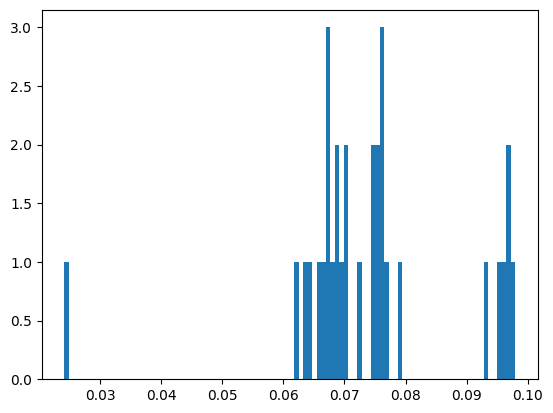

1 day after TBI macrophages


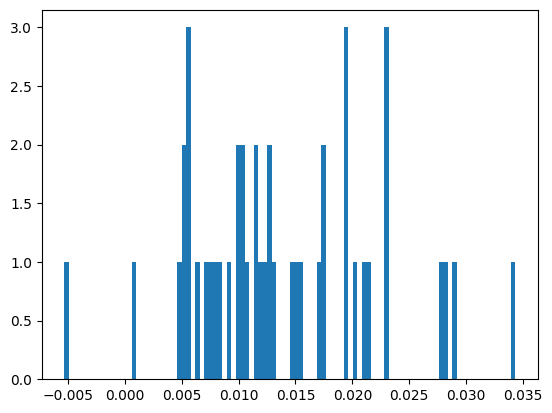

other macrophage


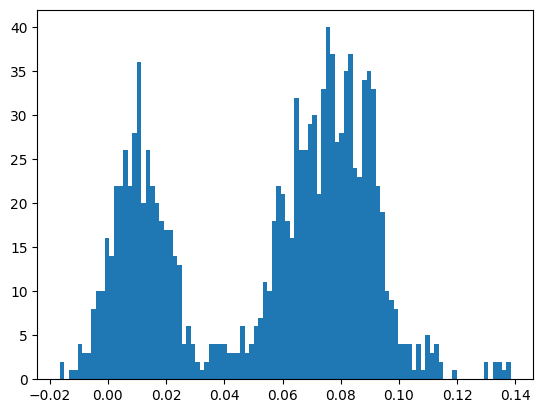

In [43]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    corr_top_cell_class(i)
T_classes = ['CD8+ T cells']
for i in T_classes:
    corr_top_cell_class(i)
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    corr_top_cell_class(i)

In [44]:
exp_top.to_csv('exp_top.csv')
dee_top.to_csv('dee_top.csv')

#### Теперь построим pca графики для всех генов из топа и сэмплов

**Отображение занимает очень много времени!**

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
#ax = sns.heatmap(exp_top, annot=True, cmap='Spectral')
#plt.show()
#ax = sns.heatmap(dee_top, annot=True, cmap='Spectral')
#plt.show()

#### Построит t-sne графики для всех сэмплов по топу генов

In [66]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy

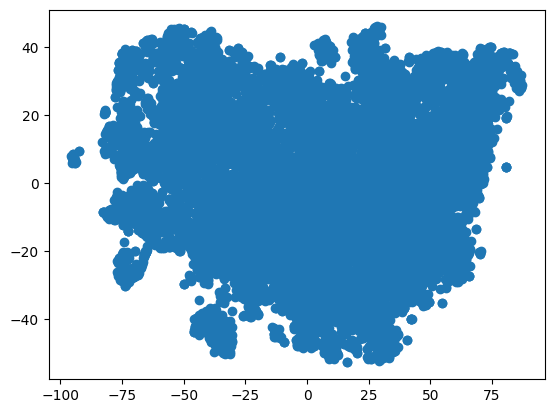

In [75]:
model = TSNE(learning_rate='auto')
tsne_features = model.fit_transform(exp_top)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs,ys)
plt.show()

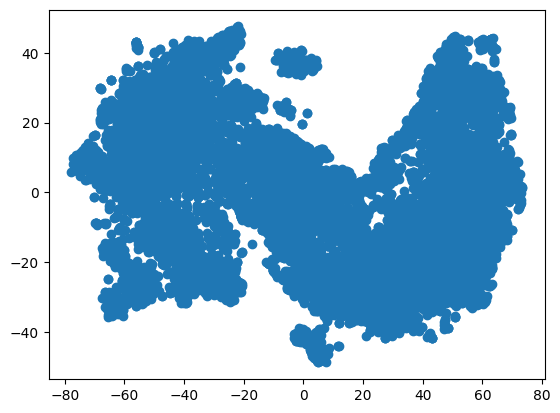

In [76]:
model = TSNE(learning_rate='auto')
tsne_features = model.fit_transform(dee_top)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs,ys)
plt.show()

#### Построим t-sne графики по типам клеток

In [79]:
def tsne_type(typ, a):
    typ=gt.loc[gt['Cell_type'] == typ]
    typ_geo=typ['geo_accession'].values.tolist()
    a=a.loc[:, a.columns.intersection(typ_geo)]
    model = TSNE(learning_rate='auto')
    tsne_features = model.fit_transform(a)
    xs = tsne_features[:,0]
    ys = tsne_features[:,1]
    plt.scatter(xs,ys)
    return print(typ), plt.show()
def tsne_class(cla, a):
    cl=gt.loc[gt['Classes'] == cla]
    cl_geo=cl['geo_accession'].values.tolist()
    a=a.loc[:, a.columns.intersection(cl_geo)]
    model = TSNE(learning_rate='auto')
    tsne_features = model.fit_transform(a)
    xs = tsne_features[:,0]
    ys = tsne_features[:,1]
    plt.scatter(xs,ys)
    return print(cla), plt.show()

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
0                0             0          28    GSM1849922    GPL13112   
1                1             1          38    GSM1897413    GPL13112   
2                2             2         334    GSM1849954    GPL13112   
3                3             3         341    GSM1229014    GPL13112   
4                4             4         570    GSM1234739    GPL13112   
...            ...           ...         ...           ...         ...   
1630          1630          1630      486647    GSM5471760    GPL24247   
1631          1631          1631      488893    GSM5481979    GPL21626   
1632          1632          1632      488894    GSM5481980    GPL21626   
1633          1633          1633      488895    GSM5481981    GPL21626   
1634          1634          1634      488896    GSM5481982    GPL21626   

     Cell_type             Classes                source_name_ch1  
0      B_cells       other B-cells         

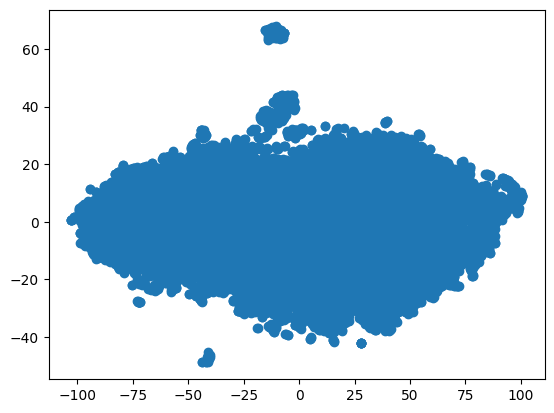

(None, None)

In [ ]:
tsne_type('B_cells', exp_top)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
0                0             0          28    GSM1849922    GPL13112   
1                1             1          38    GSM1897413    GPL13112   
2                2             2         334    GSM1849954    GPL13112   
3                3             3         341    GSM1229014    GPL13112   
4                4             4         570    GSM1234739    GPL13112   
...            ...           ...         ...           ...         ...   
1630          1630          1630      486647    GSM5471760    GPL24247   
1631          1631          1631      488893    GSM5481979    GPL21626   
1632          1632          1632      488894    GSM5481980    GPL21626   
1633          1633          1633      488895    GSM5481981    GPL21626   
1634          1634          1634      488896    GSM5481982    GPL21626   

     Cell_type             Classes                source_name_ch1  
0      B_cells       other B-cells         

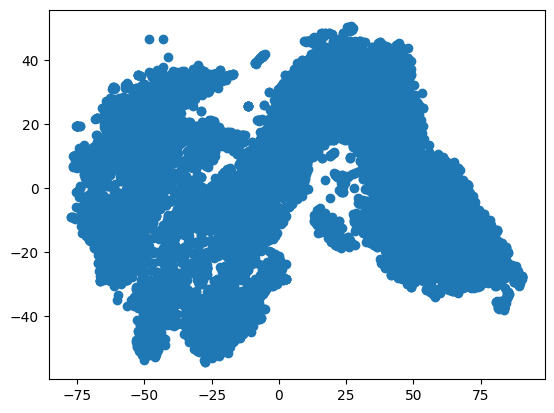

(None, None)

In [82]:
tsne_type('B_cells', dee_top)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
1635          1635             0          64    GSM1262088    GPL13112   
1636          1636             1         183    GSM1511235    GPL13112   
1637          1637             2         279    GSM1713923    GPL13112   
1638          1638             3         397    GSM1703629    GPL13112   
1639          1639             4         773    GSM1543815    GPL13112   
...            ...           ...         ...           ...         ...   
3042          3042          1407      491895    GSM5534285    GPL19057   
3043          3043          1408      491896    GSM5534286    GPL19057   
3044          3044          1409      492642    GSM5560174    GPL19057   
3045          3045          1410      492643    GSM5560175    GPL19057   
3046          3046          1411      492644    GSM5560176    GPL19057   

     Cell_type       Classes                              source_name_ch1  
1635   T_cells  CD4+ T cells       

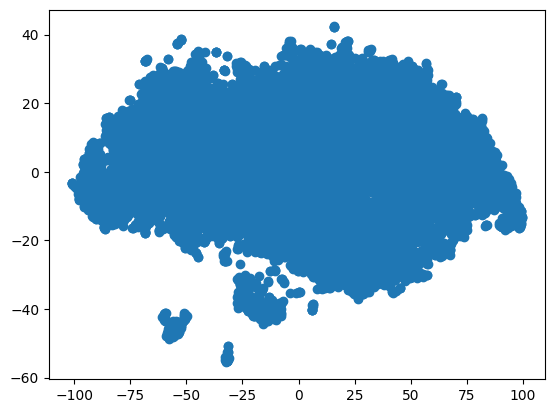

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
1635          1635             0          64    GSM1262088    GPL13112   
1636          1636             1         183    GSM1511235    GPL13112   
1637          1637             2         279    GSM1713923    GPL13112   
1638          1638             3         397    GSM1703629    GPL13112   
1639          1639             4         773    GSM1543815    GPL13112   
...            ...           ...         ...           ...         ...   
3042          3042          1407      491895    GSM5534285    GPL19057   
3043          3043          1408      491896    GSM5534286    GPL19057   
3044          3044          1409      492642    GSM5560174    GPL19057   
3045          3045          1410      492643    GSM5560175    GPL19057   
3046          3046          1411      492644    GSM5560176    GPL19057   

     Cell_type       Classes                              source_name_ch1  
1635   T_cells  CD4+ T cells       

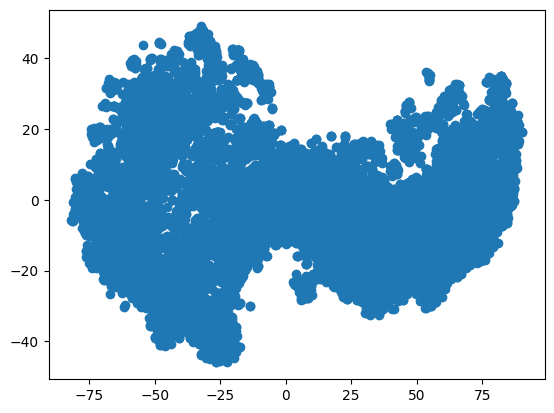

(None, None)

In [83]:
tsne_type('T_cells', exp_top)
tsne_type('T_cells', dee_top)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
3047          3047             0          19    GSM1356226    GPL13112   
3048          3048             1          76    GSM1119597    GPL13112   
3049          3049             2         106    GSM1533925    GPL13112   
3050          3050             3         240    GSM1808311    GPL13112   
3051          3051             4         274    GSM1823626    GPL13112   
...            ...           ...         ...           ...         ...   
9405          9405          6358      492513    GSM5550909    GPL19057   
9406          9406          6359      492636    GSM5558220    GPL21626   
9407          9407          6360      492637    GSM5558221    GPL21626   
9408          9408          6361      492638    GSM5558224    GPL21626   
9409          9409          6362      492639    GSM5558226    GPL21626   

       Cell_type                          Classes  \
3047  macrophage  Bone Marrow Derived macrophages   
3048 

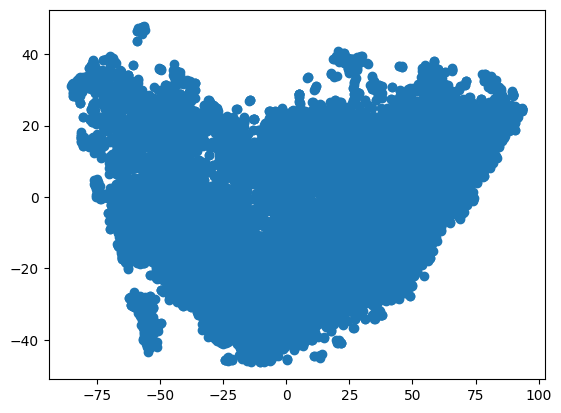

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 geo_accession platform_id  \
3047          3047             0          19    GSM1356226    GPL13112   
3048          3048             1          76    GSM1119597    GPL13112   
3049          3049             2         106    GSM1533925    GPL13112   
3050          3050             3         240    GSM1808311    GPL13112   
3051          3051             4         274    GSM1823626    GPL13112   
...            ...           ...         ...           ...         ...   
9405          9405          6358      492513    GSM5550909    GPL19057   
9406          9406          6359      492636    GSM5558220    GPL21626   
9407          9407          6360      492637    GSM5558221    GPL21626   
9408          9408          6361      492638    GSM5558224    GPL21626   
9409          9409          6362      492639    GSM5558226    GPL21626   

       Cell_type                          Classes  \
3047  macrophage  Bone Marrow Derived macrophages   
3048 

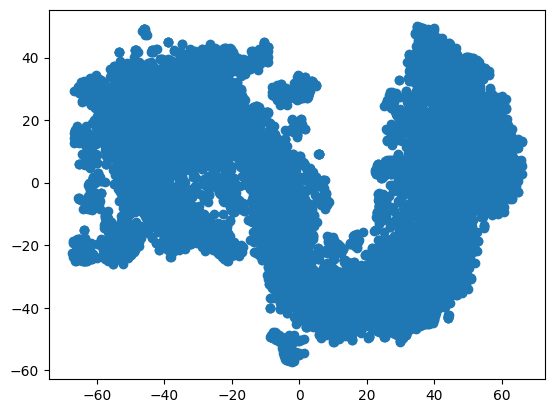

(None, None)

In [84]:
tsne_type('macrophage', exp_top)
tsne_type('macrophage', dee_top)

#### Построим t-sne графики по классам клеток

splenic B cells


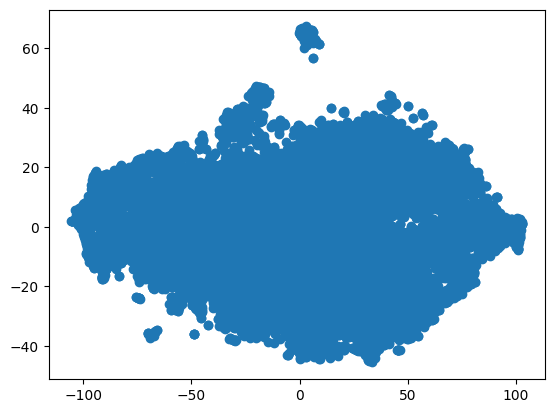

Germinal center B cells


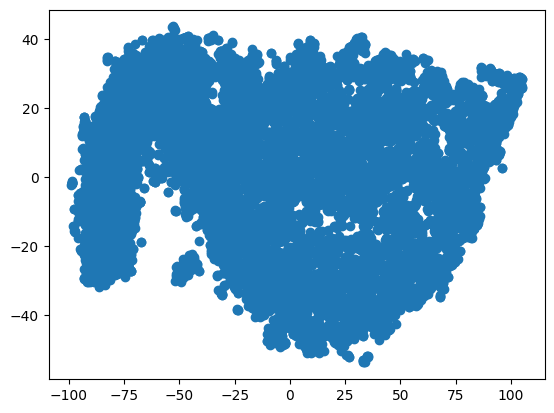

Marginal zone B cells


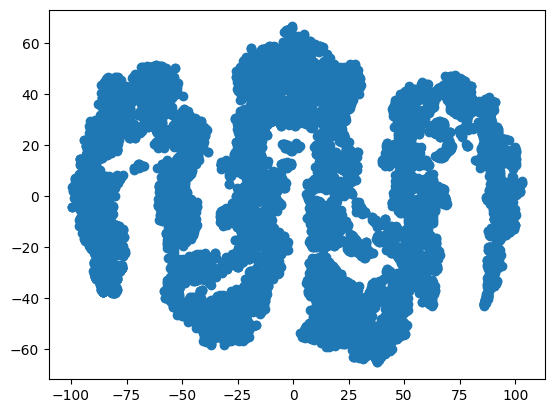

Follicular B cells


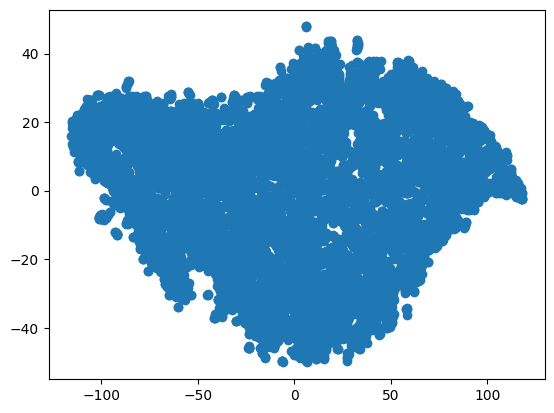

B220+ B cells


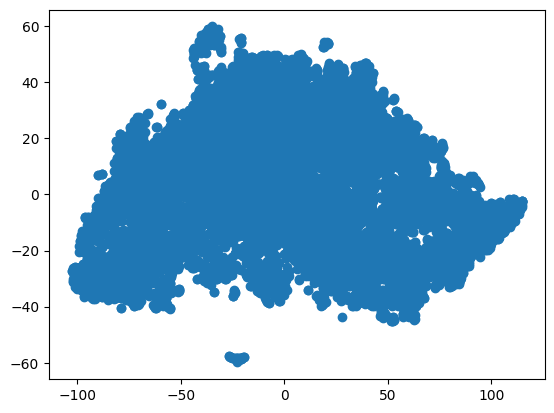

Primary B cells


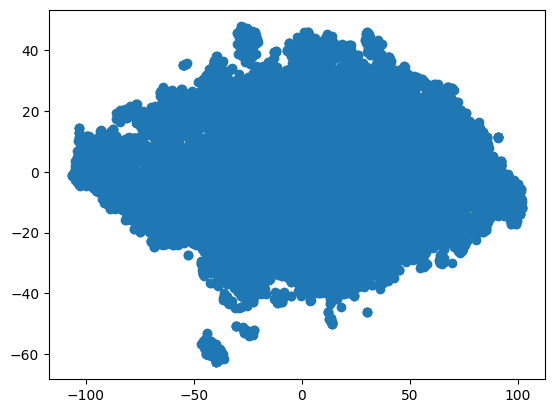

Immature B cells


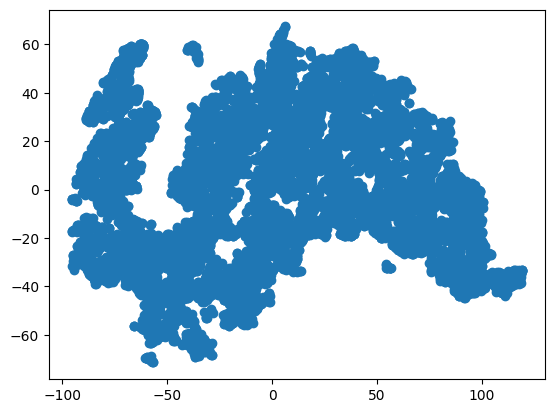

CH12 line


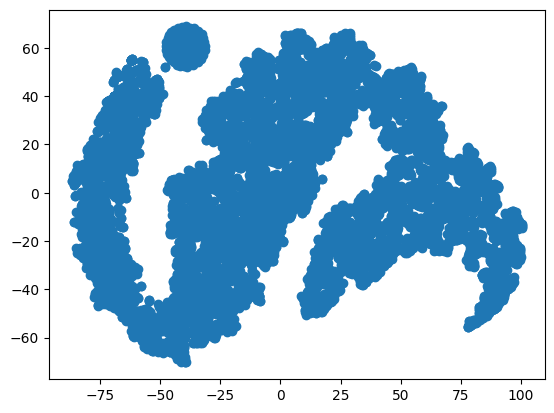

other B-cells


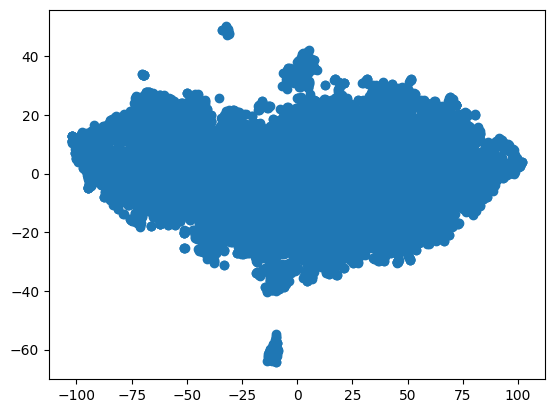

CD8+ T cells


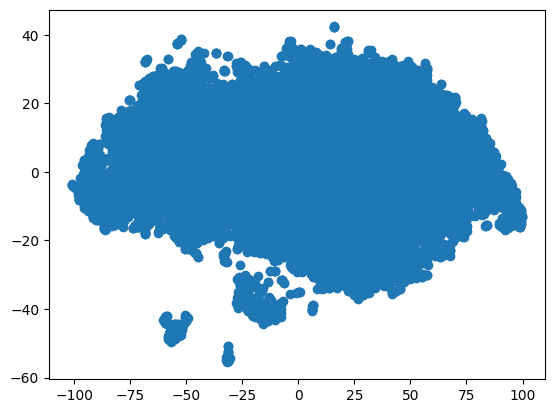

Bone Marrow Derived macrophages


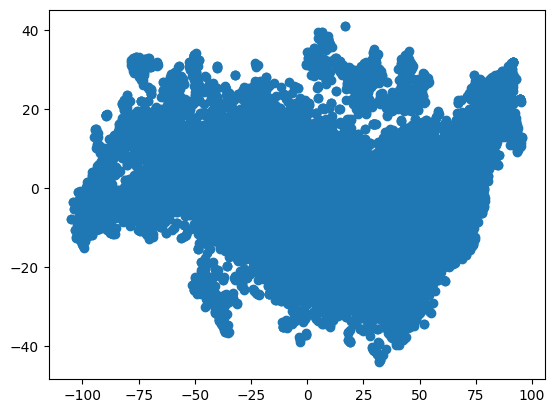

Peritoneal macrophage


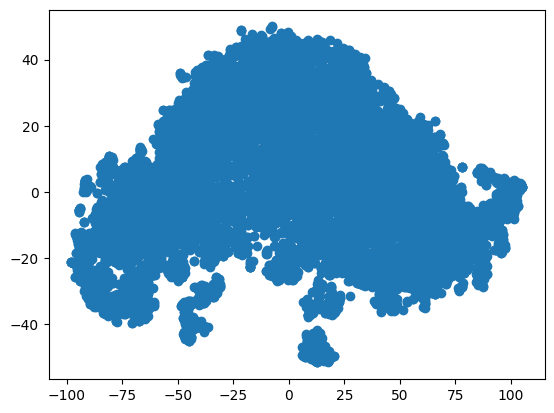

Alveolar macrophage


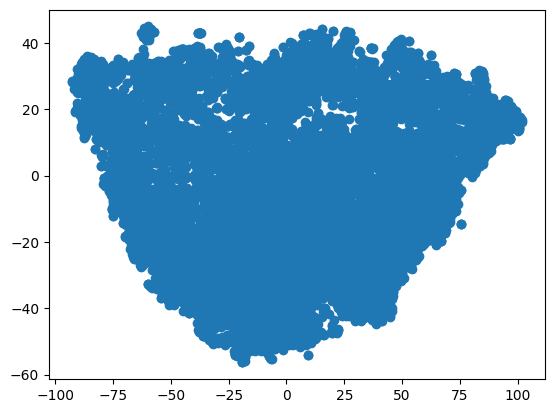

tumor macrophage


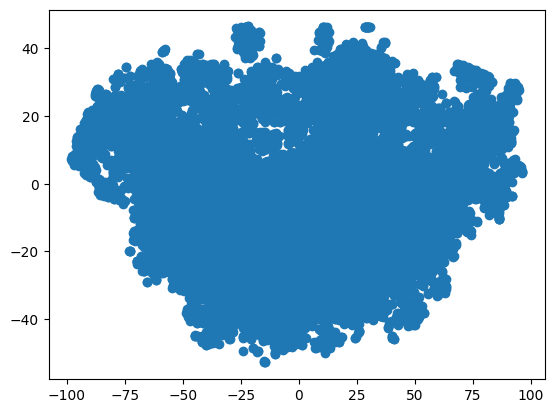

hepatic macrophages


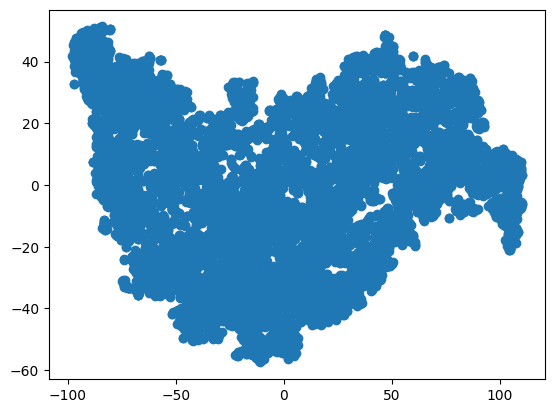

sciatic nerve macrophages


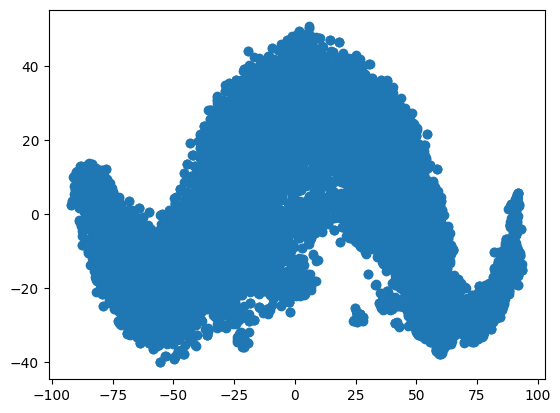

Phagocytic macrophages


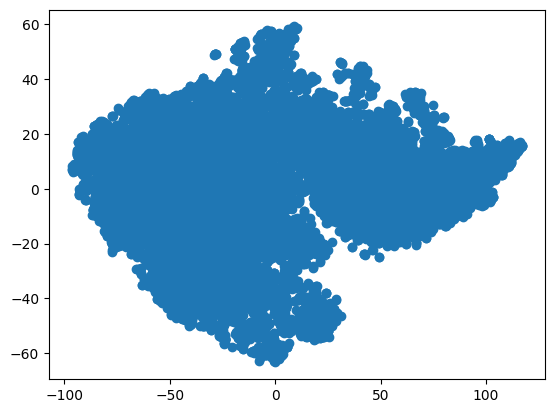

Peripheral macrophages


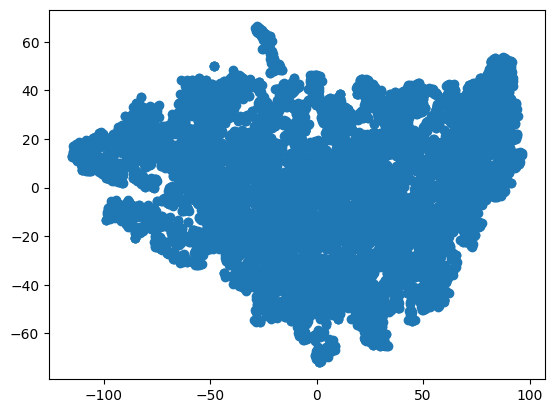

muscle macrophages


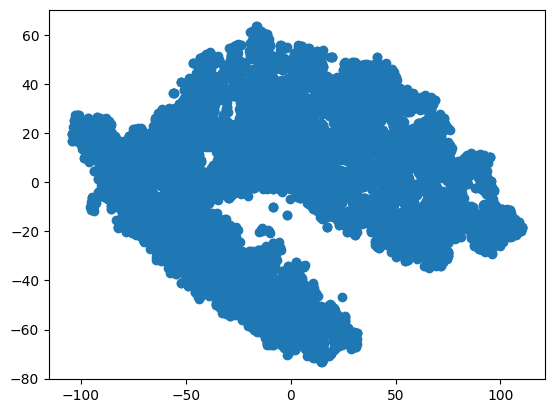

1 day after TBI macrophages


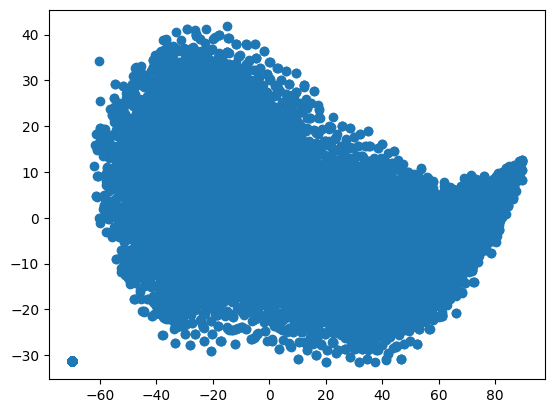

other macrophage


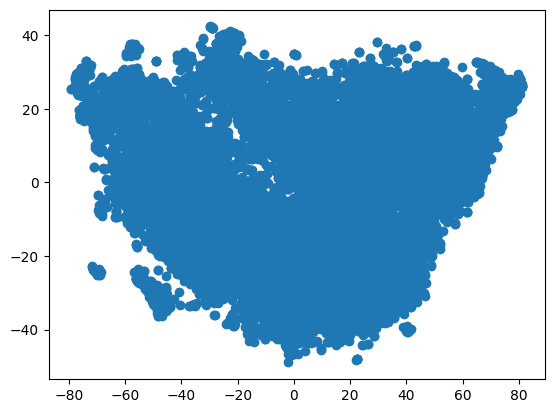

In [85]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    tsne_class(i, exp_top)
T_classes = ['CD8+ T cells']
for i in T_classes:
    tsne_class(i, exp_top)
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    tsne_class(i, exp_top)

splenic B cells


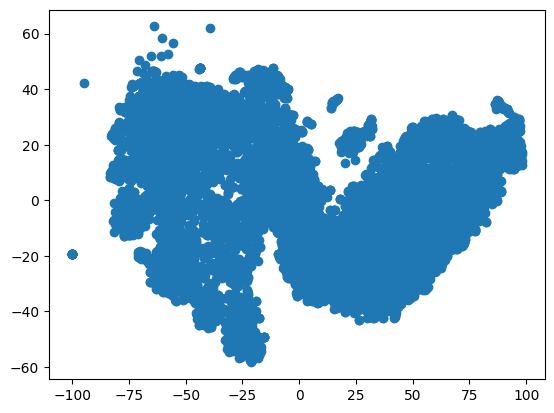

Germinal center B cells


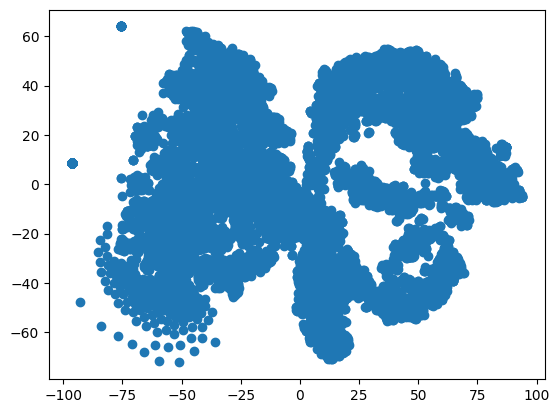

Marginal zone B cells


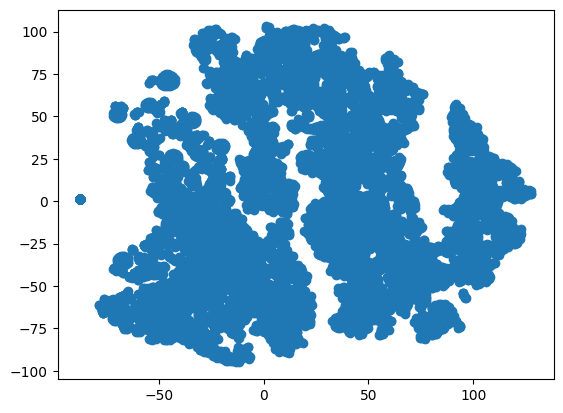

Follicular B cells


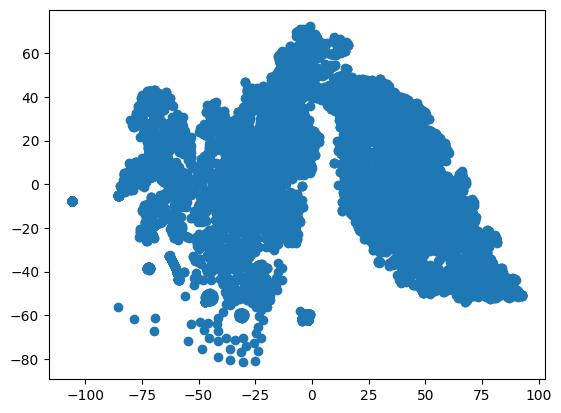

B220+ B cells


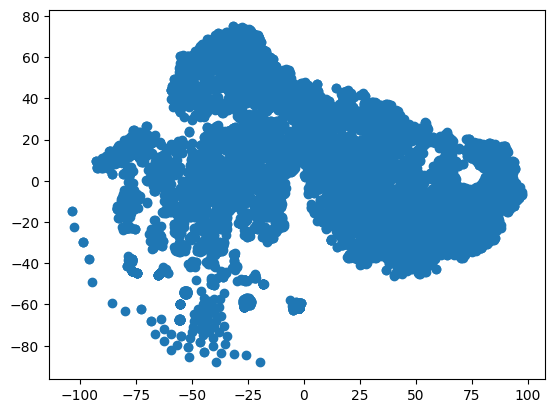

Primary B cells


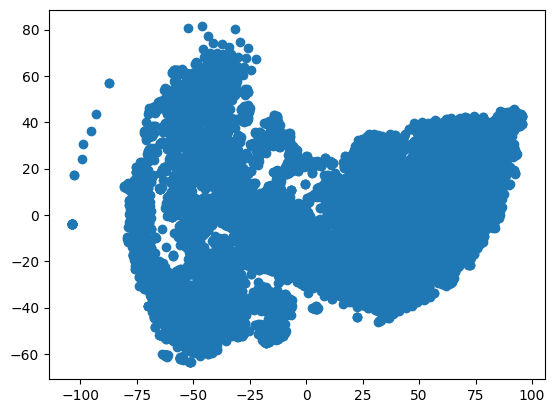

Immature B cells


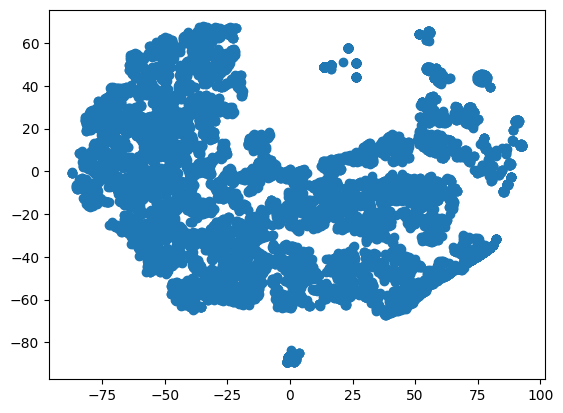

CH12 line


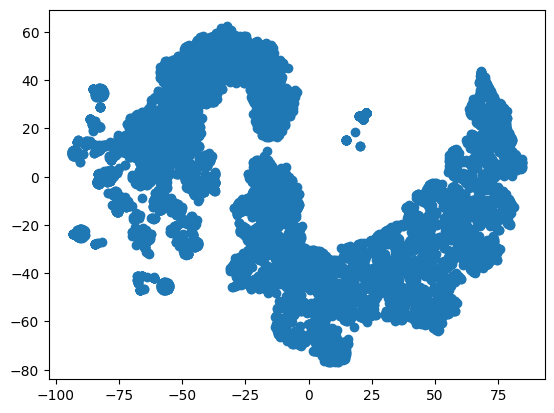

other B-cells


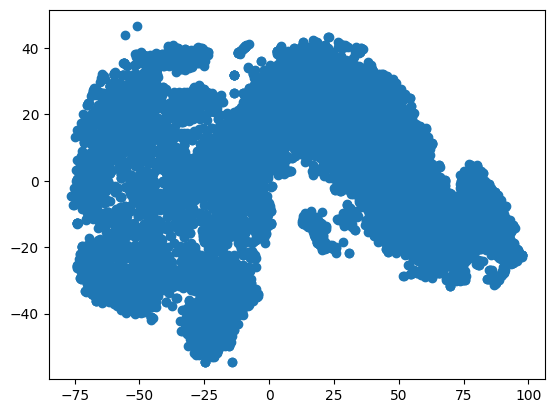

CD8+ T cells


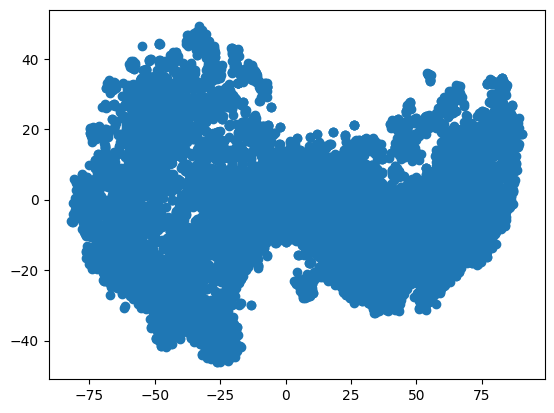

Bone Marrow Derived macrophages


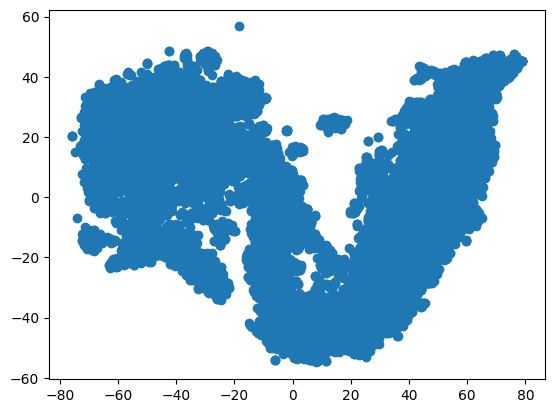

Peritoneal macrophage


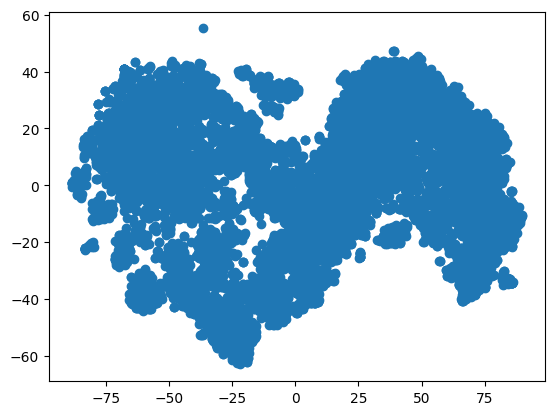

Alveolar macrophage


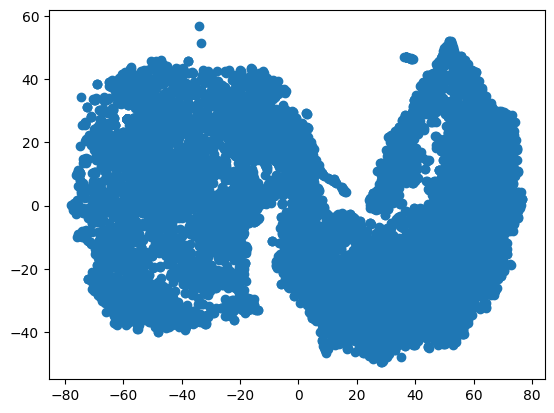

tumor macrophage


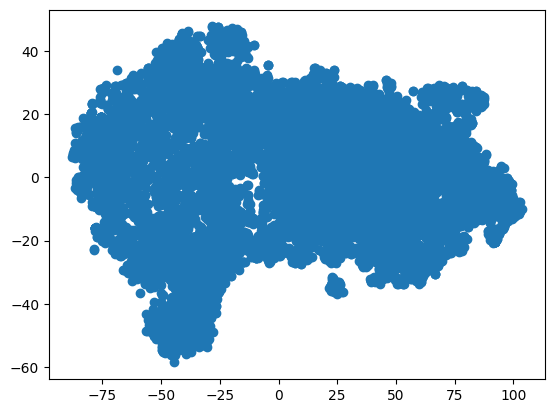

hepatic macrophages


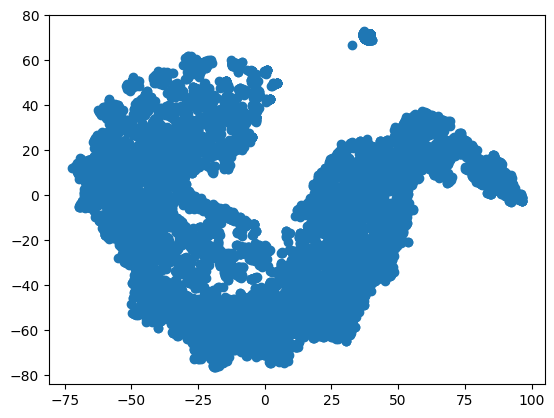

sciatic nerve macrophages


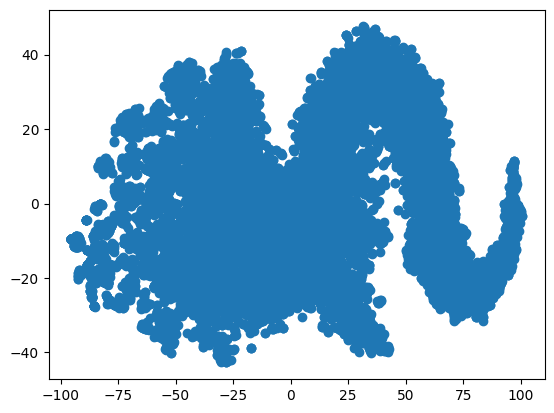

Phagocytic macrophages


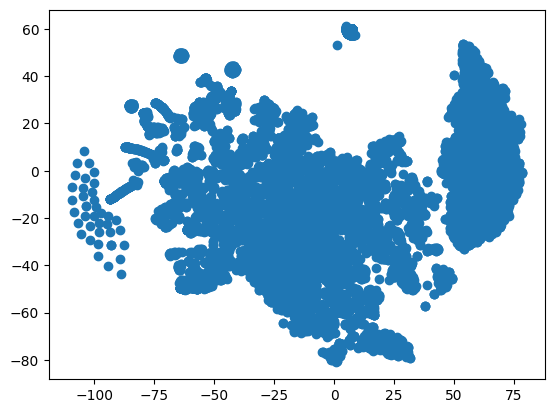

Peripheral macrophages


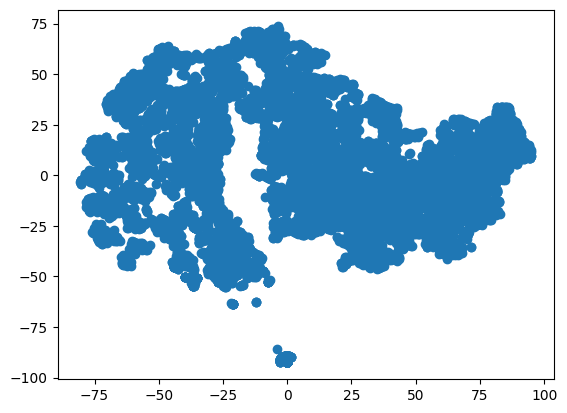

muscle macrophages


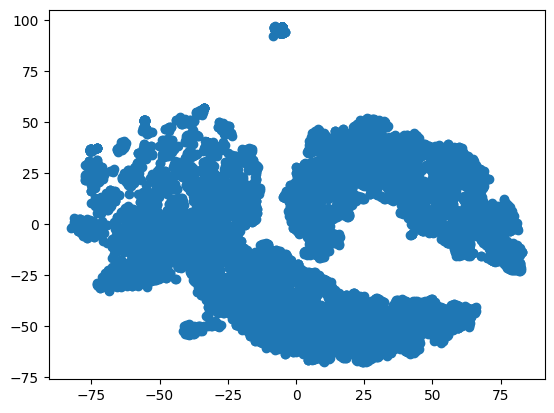

1 day after TBI macrophages


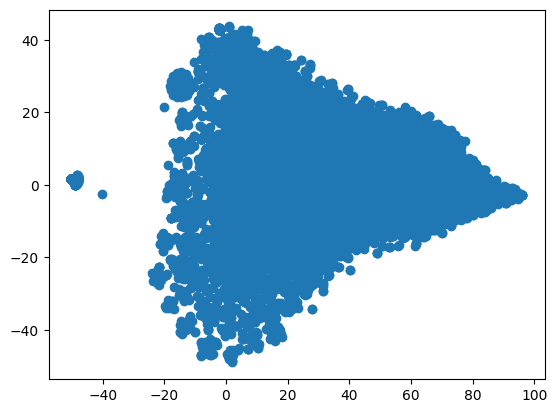

other macrophage


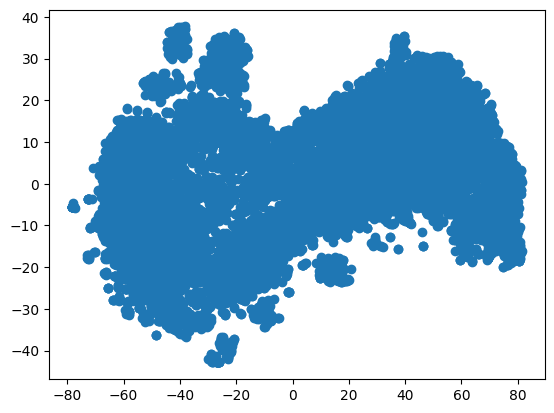

In [86]:
B_classes=['splenic B cells', 'Germinal center B cells', 'Marginal zone B cells', 'Follicular B cells', 'B220+ B cells','Primary B cells','Immature B cells','CH12 line', 'other B-cells']
for i in B_classes:
    tsne_class(i, dee_top)
T_classes = ['CD8+ T cells']
for i in T_classes:
    tsne_class(i, dee_top)
M_classes = ['Bone Marrow Derived macrophages', 'Peritoneal macrophage', 'Alveolar macrophage', 'tumor macrophage','hepatic macrophages', 'sciatic nerve macrophages','Phagocytic macrophages', 'Peripheral macrophages','muscle macrophages','1 day after TBI macrophages', 'other macrophage']
for i in M_classes:
    tsne_class(i, dee_top)